This script reproduces the [official tutorial of HDDM](http://ski.clps.brown.edu/hddm_docs/tutorial_python.html) by the HDDM (0.9.0) in this docker image.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
import hddm
import kabuki
print("HDDM's version is: ", hddm.__version__)
print("kabuki's version is: ", kabuki.__version__)

HDDM's version is:  0.8.0
kabuki's version is:  0.6.4


/opt/conda/lib/python3.8/site-packages/IPython/parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


## Loading data

In [3]:
# find the directory of "cavanagh_theta_nn.csv"
print(hddm.__file__)

/opt/conda/lib/python3.8/site-packages/hddm/__init__.py


In [4]:
!head /opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv

subj_idx,stim,rt,response,theta,dbs,conf
0,LL,1.21,1.0,0.65627512226100004,1,HC
0,WL,1.6299999999999999,1.0,-0.32788867166199998,1,LC
0,WW,1.03,1.0,-0.480284512399,1,HC
0,WL,2.77,1.0,1.9274273452399999,1,LC
0,WW,1.1399999999999999,0.0,-0.21323572605999999,1,HC
0,WL,1.1499999999999999,1.0,-0.43620365940099998,1,LC
0,LL,2.0,1.0,-0.27447891439400002,1,HC
0,WL,1.04,0.0,0.66695707371400004,1,LC
0,WW,0.85699999999999998,1.0,0.11861689909799999,1,HC


In [5]:
data = hddm.load_csv('/opt/conda/lib/python3.8/site-packages/hddm/examples/cavanagh_theta_nn.csv')
data.head()

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.21,1.0,0.656275,1,HC
1,0,WL,1.63,1.0,-0.327889,1,LC
2,0,WW,1.03,1.0,-0.480285,1,HC
3,0,WL,2.77,1.0,1.927427,1,LC
4,0,WW,1.14,0.0,-0.213236,1,HC


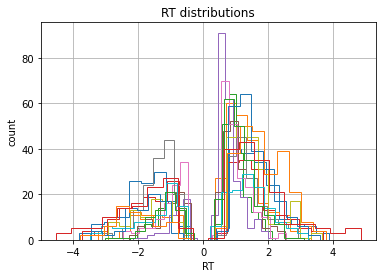

In [6]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# plt.savefig('hddm_demo_fig_00.pdf')

Check number of trials of each condition for each participant.

In [7]:
data.groupby(['subj_idx', 'stim']).size()

subj_idx  stim
0         LL       73
          WL      151
          WW       74
1         LL       74
          WL      153
          WW       71
2         LL       73
          WL      147
          WW       73
3         LL       62
          WL      129
          WW       64
4         LL       70
          WL      144
          WW       69
5         LL       77
          WL      155
          WW       71
6         LL       73
          WL      154
          WW       72
7         LL       77
          WL      142
          WW       75
8         LL       74
          WL      148
          WW       71
9         LL       53
          WL      110
          WW       54
10        LL       76
          WL      157
          WW       76
11        LL       73
          WL      153
          WW       79
12        LL       61
          WL      138
          WW       68
13        LL       68
          WL      135
          WW       71
dtype: int64

## Fitting a hierarchical model

In [8]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m1 = hddm.HDDM(data)
# find a good starting point which helps with the convergence.
m1.find_starting_values()
# start drawing 7000 samples and discarding 5000 as burn-in
m1.sample(2000, burn=500)

/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 96.2 sec

In [9]:
stats = m1.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.970947,0.093515,1.788782,1.907689,1.968165,2.030866,2.164823,0.002386
a_std,0.341539,0.081753,0.225157,0.284399,0.328114,0.383873,0.538912,0.002833
a_subj.0,2.197791,0.0641,2.077013,2.152916,2.196249,2.24312,2.325634,0.002338
a_subj.1,2.115827,0.066624,1.992749,2.069054,2.114972,2.159017,2.249794,0.002618


Plotting a
Plotting a_std
Plotting v
Plotting t


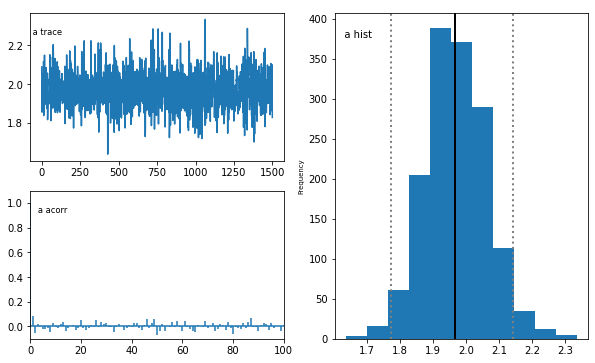

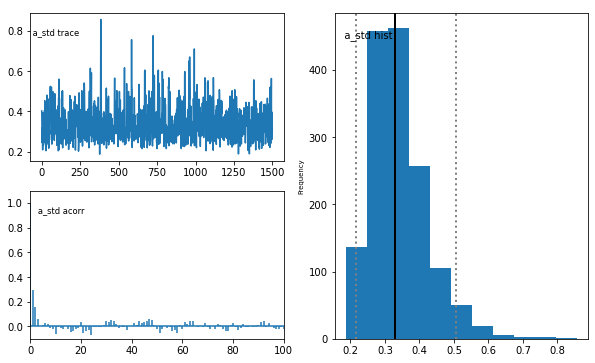

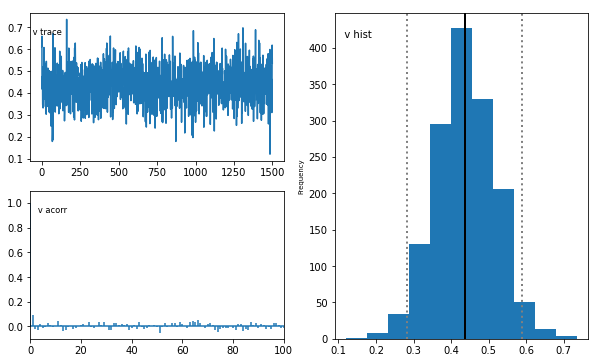

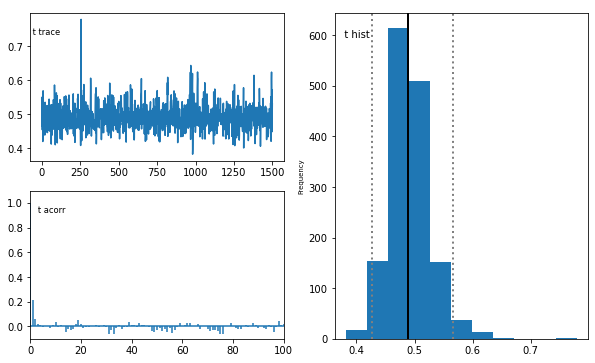

In [10]:
m1.plot_posteriors(['a', 't', 'v', 'a_std'])

/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(nrows), columns, subj_i+1)
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(nrows), columns, subj_i+1)
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.ceil(nrows), columns, subj_i+1)
/opt/conda/lib/python3.8/site-packages/kabuki/analyze.py:580: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is d

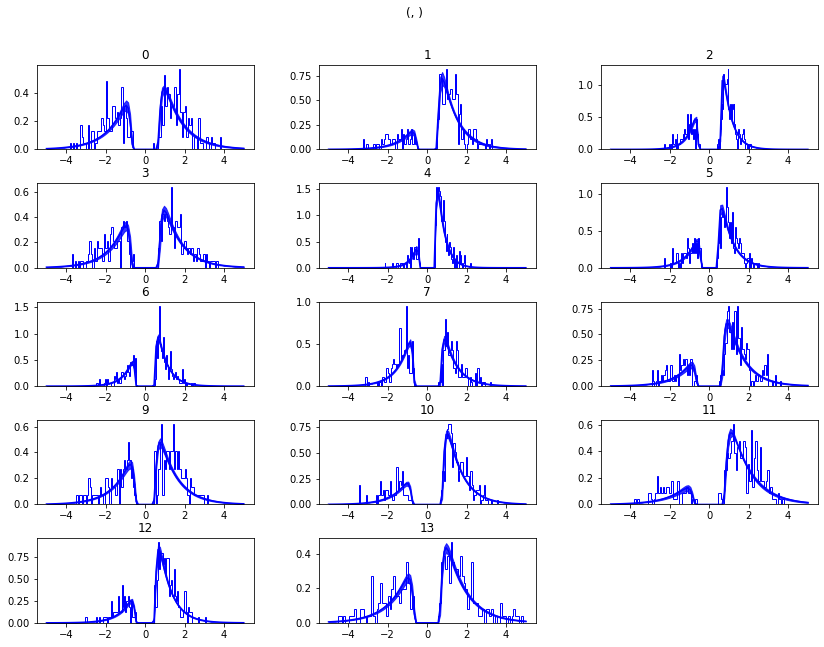

In [11]:
m1.plot_posterior_predictive(figsize=(14, 10))

## Calculate Gelman_rubin r hat.

The original tutorial used `for` loop:

In [12]:
# models = []
# for i in range(5):
#     m = hddm.HDDM(data)
#     m.find_starting_values()
#     m.sample(5000, burn=20)
#     models.append(m)

# hddm.analyze.gelman_rubin(models)

Here, we replace the `for` loop with parallel processing:

In [13]:
# parallel processing related packages
from p_tqdm import p_map
from functools import partial

In [14]:
def ms1(id, data=None, samples=None, burn=None, save_name="cavanagh2011_m1"): 

    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    m = hddm.HDDM(data)
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [15]:
samples = 5000  # Cavanagh used 30,000 and 10, 000 burn.
burn = 1000    
thin = 1
chains = 4

In [16]:
models_1 = p_map(partial(ms1, data=data, samples=samples, burn=burn),
                 range(chains)) # progess bar is a mess ;(

running model1
running model0


  0%|          | 0/4 [00:00<?, ?it/s]

running model2
running model3


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [                  0%                  ] 12 of 5000 complete in 0.5 sec[                  0%                  ] 12 of 5000 complete in 0.5 sec[                  0%                  ] 12 of 5000 complete in 0.5 sec[                  0%                  ] 12 of 5000 complete in 0.5 sec[                  0%                  ] 23 of 5000 complete in 1.0 sec[                  0%                  ] 23 of 5000 complete in 1.0 sec[                  0%                  ] 23 of 5000 complete in 1.0 sec[                  0%                  ] 23 of 5000 complete in 1.1 sec[                  0%                  ] 34 of 5000 complete in 1.5 sec[                  0%                  ] 34 of 5000 complete in 1.5 sec[                  0%                  ] 34 of 5000 complete in 1.6 sec[                  0%                  ] 34 of 5000 complete in 1.6 sec[                  0%                  ] 44 of 5000 complete in 2.0 sec[                  0%                  ] 45 of 5000 complete in 2.1 sec[    

 [--                6%                  ] 320 of 5000 complete in 15.3 sec[--                6%                  ] 318 of 5000 complete in 15.4 sec[--                6%                  ] 329 of 5000 complete in 15.6 sec[--                6%                  ] 330 of 5000 complete in 15.6 sec[--                6%                  ] 331 of 5000 complete in 15.8 sec[--                6%                  ] 328 of 5000 complete in 15.9 sec[--                6%                  ] 340 of 5000 complete in 16.1 sec[--                6%                  ] 341 of 5000 complete in 16.1 sec[--                6%                  ] 342 of 5000 complete in 16.3 sec[--                6%                  ] 339 of 5000 complete in 16.4 sec[--                7%                  ] 351 of 5000 complete in 16.6 sec[--                7%                  ] 351 of 5000 complete in 16.6 sec[--                7%                  ] 353 of 5000 complete in 16.9 sec[--                7%                  ] 350 of 50

 [----             12%                  ] 628 of 5000 complete in 30.0 sec[----             12%                  ] 638 of 5000 complete in 30.1 sec[----             12%                  ] 636 of 5000 complete in 30.3 sec[----             12%                  ] 635 of 5000 complete in 30.4 sec[----             12%                  ] 639 of 5000 complete in 30.5 sec[----             12%                  ] 649 of 5000 complete in 30.6 sec[----             12%                  ] 647 of 5000 complete in 30.8 sec[----             12%                  ] 646 of 5000 complete in 30.9 sec[----             13%                  ] 650 of 5000 complete in 31.0 sec[-----            13%                  ] 660 of 5000 complete in 31.1 sec[-----            13%                  ] 658 of 5000 complete in 31.3 sec[----             13%                  ] 657 of 5000 complete in 31.4 sec[-----            13%                  ] 661 of 5000 complete in 31.6 sec[-----            13%                  ] 671 of 50

 [-------          18%                  ] 942 of 5000 complete in 44.8 sec[-------          18%                  ] 936 of 5000 complete in 44.8 sec[-------          18%                  ] 945 of 5000 complete in 44.9 sec[-------          19%                  ] 959 of 5000 complete in 45.1 sec[-------          19%                  ] 952 of 5000 complete in 45.3 sec[-------          18%                  ] 947 of 5000 complete in 45.3 sec[-------          19%                  ] 956 of 5000 complete in 45.4 sec[-------          19%                  ] 969 of 5000 complete in 45.6 sec[-------          19%                  ] 963 of 5000 complete in 45.8 sec[-------          19%                  ] 958 of 5000 complete in 45.9 sec[-------          19%                  ] 967 of 5000 complete in 46.0 sec[-------          19%                  ] 979 of 5000 complete in 46.2 sec[-------          19%                  ] 974 of 5000 complete in 46.3 sec[-------          19%                  ] 969 of 50

 [---------        25%                  ] 1252 of 5000 complete in 59.2 sec[---------        24%                  ] 1248 of 5000 complete in 59.3 sec[---------        24%                  ] 1241 of 5000 complete in 59.4 sec[---------        25%                  ] 1251 of 5000 complete in 59.6 sec[---------        25%                  ] 1262 of 5000 complete in 59.7 sec[---------        25%                  ] 1258 of 5000 complete in 59.9 sec[---------        25%                  ] 1252 of 5000 complete in 59.9 sec[---------        25%                  ] 1262 of 5000 complete in 60.1 sec[---------        25%                  ] 1273 of 5000 complete in 60.2 sec[---------        25%                  ] 1269 of 5000 complete in 60.4 sec[---------        25%                  ] 1263 of 5000 complete in 60.4 sec[---------        25%                  ] 1273 of 5000 complete in 60.6 sec[---------        25%                  ] 1284 of 5000 complete in 60.8 sec[---------        25%                

 [-----------      30%                  ] 1547 of 5000 complete in 73.5 sec[-----------      31%                  ] 1557 of 5000 complete in 73.9 sec[-----------      31%                  ] 1555 of 5000 complete in 74.0 sec[-----------      30%                  ] 1547 of 5000 complete in 74.0 sec[-----------      31%                  ] 1558 of 5000 complete in 74.0 sec[-----------      31%                  ] 1567 of 5000 complete in 74.4 sec[-----------      31%                  ] 1566 of 5000 complete in 74.5 sec[-----------      31%                  ] 1558 of 5000 complete in 74.5 sec[-----------      31%                  ] 1569 of 5000 complete in 74.6 sec[-----------      31%                  ] 1578 of 5000 complete in 74.9 sec[-----------      31%                  ] 1577 of 5000 complete in 75.0 sec[-----------      31%                  ] 1569 of 5000 complete in 75.1 sec[------------     31%                  ] 1580 of 5000 complete in 75.1 sec[------------     31%                

 [--------------   36%                  ] 1843 of 5000 complete in 88.2 sec[--------------   37%                  ] 1851 of 5000 complete in 88.2 sec[--------------   37%                  ] 1866 of 5000 complete in 88.4 sec[--------------   37%                  ] 1863 of 5000 complete in 88.6 sec[--------------   37%                  ] 1854 of 5000 complete in 88.7 sec[--------------   37%                  ] 1862 of 5000 complete in 88.7 sec[--------------   37%                  ] 1877 of 5000 complete in 88.9 sec[--------------   37%                  ] 1874 of 5000 complete in 89.2 sec[--------------   37%                  ] 1873 of 5000 complete in 89.2 sec[--------------   37%                  ] 1865 of 5000 complete in 89.2 sec[--------------   37%                  ] 1888 of 5000 complete in 89.4 sec[--------------   37%                  ] 1885 of 5000 complete in 89.7 sec[--------------   37%                  ] 1883 of 5000 complete in 89.8 sec[--------------   37%                

 [---------------- 43%                  ] 2152 of 5000 complete in 102.8 sec[---------------- 43%                  ] 2159 of 5000 complete in 102.9 sec[---------------- 42%                  ] 2147 of 5000 complete in 102.9 sec[---------------- 43%                  ] 2173 of 5000 complete in 103.0 sec[---------------- 43%                  ] 2163 of 5000 complete in 103.3 sec[---------------- 43%                  ] 2170 of 5000 complete in 103.4 sec[---------------- 43%                  ] 2158 of 5000 complete in 103.4 sec[---------------- 43%                  ] 2184 of 5000 complete in 103.5 sec[---------------- 43%                  ] 2174 of 5000 complete in 103.8 sec[---------------- 43%                  ] 2180 of 5000 complete in 103.9 sec[---------------- 43%                  ] 2169 of 5000 complete in 104.0 sec[---------------- 43%                  ] 2195 of 5000 complete in 104.0 sec[---------------- 43%                  ] 2185 of 5000 complete in 104.3 sec[---------------- 43%   

 [-----------------48%                  ] 2449 of 5000 complete in 117.0 sec[-----------------48%                  ] 2442 of 5000 complete in 117.2 sec[-----------------49%                  ] 2460 of 5000 complete in 117.4 sec[-----------------49%                  ] 2480 of 5000 complete in 117.6 sec[-----------------49%                  ] 2460 of 5000 complete in 117.6 sec[-----------------49%                  ] 2452 of 5000 complete in 117.7 sec[-----------------49%                  ] 2471 of 5000 complete in 118.0 sec[-----------------49%                  ] 2491 of 5000 complete in 118.1 sec[-----------------49%                  ] 2471 of 5000 complete in 118.1 sec[-----------------49%                  ] 2463 of 5000 complete in 118.2 sec[-----------------49%                  ] 2482 of 5000 complete in 118.5 sec[-----------------50%                  ] 2502 of 5000 complete in 118.7 sec[-----------------49%                  ] 2482 of 5000 complete in 118.6 sec[-----------------49%   

 [-----------------55%                  ] 2757 of 5000 complete in 131.7 sec[-----------------55%-                 ] 2776 of 5000 complete in 131.7 sec[-----------------55%                  ] 2757 of 5000 complete in 131.7 sec[-----------------54%                  ] 2748 of 5000 complete in 131.8 sec[-----------------55%-                 ] 2768 of 5000 complete in 132.2 sec[-----------------55%-                 ] 2787 of 5000 complete in 132.2 sec[-----------------55%-                 ] 2768 of 5000 complete in 132.2 sec[-----------------55%                  ] 2759 of 5000 complete in 132.4 sec[-----------------55%-                 ] 2779 of 5000 complete in 132.7 sec[-----------------55%-                 ] 2798 of 5000 complete in 132.8 sec[-----------------55%-                 ] 2779 of 5000 complete in 132.8 sec[-----------------55%-                 ] 2770 of 5000 complete in 132.9 sec[-----------------55%-                 ] 2790 of 5000 complete in 133.3 sec[-----------------56%-  

 [-----------------61%---               ] 3072 of 5000 complete in 145.9 sec[-----------------60%---               ] 3043 of 5000 complete in 146.0 sec[-----------------61%---               ] 3066 of 5000 complete in 146.3 sec[-----------------61%---               ] 3064 of 5000 complete in 146.4 sec[-----------------61%---               ] 3083 of 5000 complete in 146.4 sec[-----------------61%---               ] 3053 of 5000 complete in 146.5 sec[-----------------61%---               ] 3077 of 5000 complete in 146.9 sec[-----------------61%---               ] 3075 of 5000 complete in 146.9 sec[-----------------61%---               ] 3094 of 5000 complete in 147.0 sec[-----------------61%---               ] 3064 of 5000 complete in 147.0 sec[-----------------61%---               ] 3088 of 5000 complete in 147.4 sec[-----------------61%---               ] 3086 of 5000 complete in 147.4 sec[-----------------62%---               ] 3105 of 5000 complete in 147.5 sec[-----------------61%---

 [-----------------67%-----             ] 3359 of 5000 complete in 160.4 sec[-----------------67%-----             ] 3359 of 5000 complete in 160.5 sec[-----------------66%-----             ] 3346 of 5000 complete in 160.6 sec[-----------------67%-----             ] 3379 of 5000 complete in 160.6 sec[-----------------67%-----             ] 3370 of 5000 complete in 160.9 sec[-----------------67%-----             ] 3370 of 5000 complete in 161.0 sec[-----------------67%-----             ] 3357 of 5000 complete in 161.1 sec[-----------------67%-----             ] 3390 of 5000 complete in 161.2 sec[-----------------67%-----             ] 3381 of 5000 complete in 161.4 sec[-----------------67%-----             ] 3381 of 5000 complete in 161.5 sec[-----------------67%-----             ] 3368 of 5000 complete in 161.6 sec[-----------------68%-----             ] 3401 of 5000 complete in 161.7 sec[-----------------67%-----             ] 3392 of 5000 complete in 161.9 sec[-----------------67%---

 [-----------------73%-------           ] 3675 of 5000 complete in 174.8 sec[-----------------73%-------           ] 3666 of 5000 complete in 174.9 sec[-----------------72%-------           ] 3642 of 5000 complete in 174.9 sec[-----------------73%-------           ] 3667 of 5000 complete in 175.1 sec[-----------------73%--------          ] 3686 of 5000 complete in 175.3 sec[-----------------73%-------           ] 3653 of 5000 complete in 175.4 sec[-----------------73%-------           ] 3677 of 5000 complete in 175.4 sec[-----------------73%-------           ] 3678 of 5000 complete in 175.6 sec[-----------------73%--------          ] 3697 of 5000 complete in 175.8 sec[-----------------73%--------          ] 3688 of 5000 complete in 176.0 sec[-----------------73%-------           ] 3664 of 5000 complete in 176.0 sec[-----------------73%--------          ] 3689 of 5000 complete in 176.1 sec[-----------------74%--------          ] 3708 of 5000 complete in 176.3 sec[-----------------73%---

 [-----------------78%---------         ] 3938 of 5000 complete in 189.1 sec[-----------------79%----------        ] 3962 of 5000 complete in 189.2 sec[-----------------79%----------        ] 3982 of 5000 complete in 189.4 sec[-----------------79%----------        ] 3972 of 5000 complete in 189.5 sec[-----------------78%----------        ] 3949 of 5000 complete in 189.6 sec[-----------------79%----------        ] 3973 of 5000 complete in 189.7 sec[-----------------79%----------        ] 3993 of 5000 complete in 189.9 sec[-----------------79%----------        ] 3983 of 5000 complete in 190.0 sec[-----------------79%----------        ] 3960 of 5000 complete in 190.1 sec[-----------------79%----------        ] 3984 of 5000 complete in 190.2 sec[-----------------80%----------        ] 4004 of 5000 complete in 190.4 sec[-----------------79%----------        ] 3995 of 5000 complete in 190.6 sec[-----------------79%----------        ] 3971 of 5000 complete in 190.6 sec[-----------------79%---

 [-----------------85%------------      ] 4280 of 5000 complete in 203.4 sec[-----------------85%------------      ] 4268 of 5000 complete in 203.5 sec[-----------------84%------------      ] 4247 of 5000 complete in 203.7 sec[-----------------85%------------      ] 4271 of 5000 complete in 203.7 sec[-----------------85%------------      ] 4291 of 5000 complete in 203.9 sec[-----------------85%------------      ] 4279 of 5000 complete in 204.1 sec[-----------------85%------------      ] 4258 of 5000 complete in 204.2 sec[-----------------85%------------      ] 4282 of 5000 complete in 204.3 sec[-----------------86%------------      ] 4302 of 5000 complete in 204.4 sec[-----------------85%------------      ] 4290 of 5000 complete in 204.6 sec[-----------------85%------------      ] 4269 of 5000 complete in 204.7 sec[-----------------85%------------      ] 4293 of 5000 complete in 204.8 sec[-----------------86%------------      ] 4313 of 5000 complete in 204.9 sec[-----------------86%---

 [-----------------91%--------------    ] 4568 of 5000 complete in 217.8 sec[-----------------90%--------------    ] 4542 of 5000 complete in 217.9 sec[-----------------91%--------------    ] 4585 of 5000 complete in 218.1 sec[-----------------91%--------------    ] 4574 of 5000 complete in 218.2 sec[-----------------91%--------------    ] 4579 of 5000 complete in 218.3 sec[-----------------91%--------------    ] 4553 of 5000 complete in 218.4 sec[-----------------91%--------------    ] 4596 of 5000 complete in 218.6 sec[-----------------91%--------------    ] 4585 of 5000 complete in 218.7 sec[-----------------91%--------------    ] 4590 of 5000 complete in 218.8 sec[-----------------91%--------------    ] 4564 of 5000 complete in 219.0 sec[-----------------92%---------------   ] 4607 of 5000 complete in 219.2 sec[-----------------91%--------------    ] 4596 of 5000 complete in 219.2 sec[-----------------92%--------------    ] 4601 of 5000 complete in 219.4 sec[-----------------91%---

 [-----------------97%----------------- ] 4882 of 5000 complete in 232.3 sec[-----------------97%----------------  ] 4868 of 5000 complete in 232.4 sec[-----------------97%----------------- ] 4874 of 5000 complete in 232.5 sec[-----------------96%----------------  ] 4846 of 5000 complete in 232.6 sec[-----------------97%----------------- ] 4893 of 5000 complete in 232.8 sec[-----------------97%----------------- ] 4879 of 5000 complete in 232.9 sec[-----------------97%----------------- ] 4885 of 5000 complete in 233.0 sec[-----------------97%----------------  ] 4857 of 5000 complete in 233.1 sec[-----------------98%----------------- ] 4904 of 5000 complete in 233.4 sec[-----------------97%----------------- ] 4890 of 5000 complete in 233.4 sec[-----------------97%----------------- ] 4896 of 5000 complete in 233.5 sec[-----------------97%----------------  ] 4868 of 5000 complete in 233.7 sec[-----------------98%----------------- ] 4915 of 5000 complete in 233.9 sec[-----------------98%---

In [17]:
hddm.analyze.gelman_rubin(models_1)

{'a': 1.0000215873746159,
 'a_std': 0.9999895283501594,
 'a_subj.0': 0.9998908650471644,
 'a_subj.1': 1.0000705734979998,
 'a_subj.2': 1.0003061831200557,
 'a_subj.3': 0.9998916755525875,
 'a_subj.4': 1.000250204844567,
 'a_subj.5': 0.999907718927123,
 'a_subj.6': 0.9999017760487727,
 'a_subj.7': 1.000290594519337,
 'a_subj.8': 0.9999958808684247,
 'a_subj.9': 0.9999763987722962,
 'a_subj.10': 0.9998763223844921,
 'a_subj.11': 1.000204346264372,
 'a_subj.12': 1.0000582907111673,
 'a_subj.13': 1.0004876324379866,
 'v': 0.9998834359107118,
 'v_std': 1.0002588703957012,
 'v_subj.0': 1.0000425084547513,
 'v_subj.1': 1.000025831701131,
 'v_subj.2': 1.0002349580793022,
 'v_subj.3': 1.0000766139070671,
 'v_subj.4': 0.9999673424429019,
 'v_subj.5': 1.0000887120833504,
 'v_subj.6': 0.9999027013482088,
 'v_subj.7': 0.9999204158421262,
 'v_subj.8': 0.9999404348250681,
 'v_subj.9': 1.0001899068927738,
 'v_subj.10': 0.99994102491208,
 'v_subj.11': 0.9999813642730242,
 'v_subj.12': 0.999932411598705

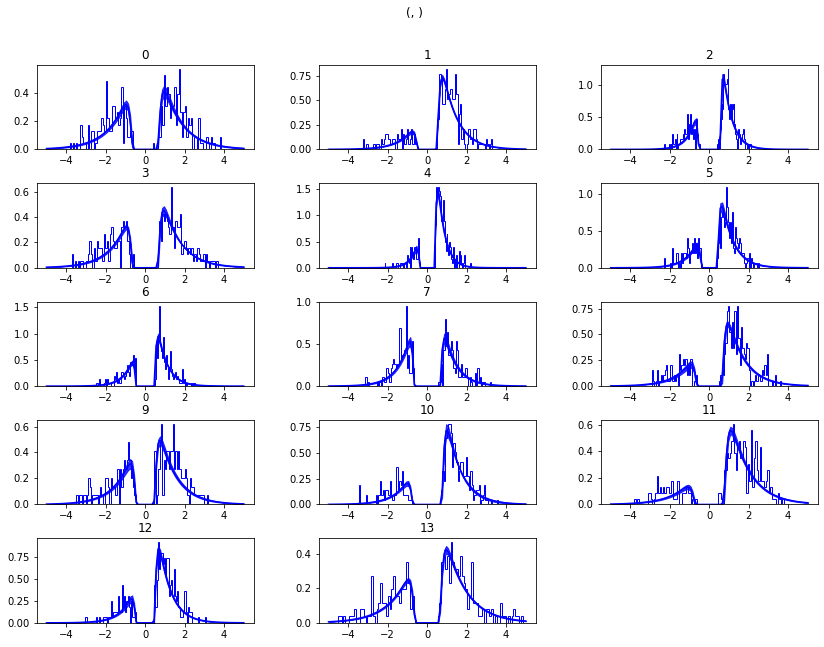

In [18]:
models_1[0].plot_posterior_predictive(figsize=(14, 10))

In [19]:
m_comb = kabuki.utils.concat_models(models_1) # combine four chains together

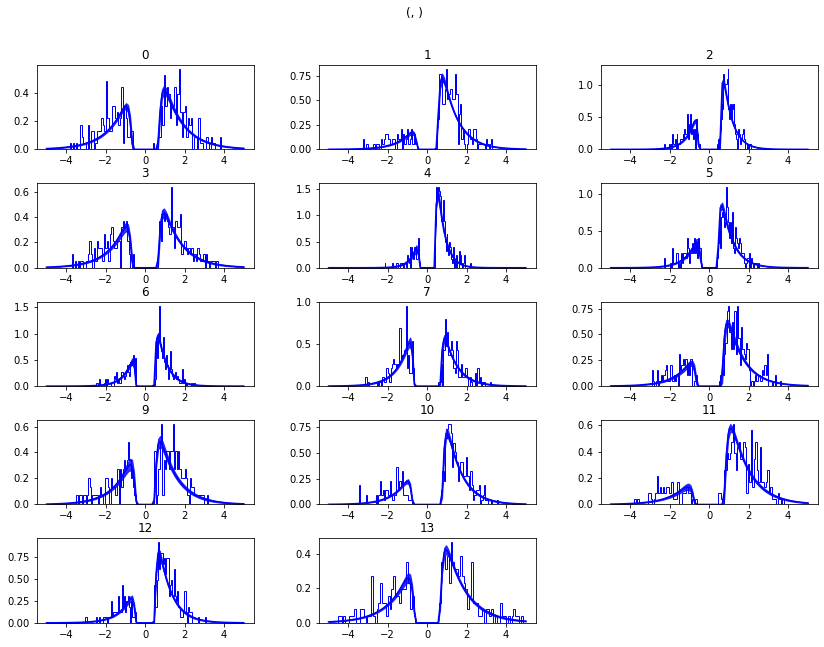

In [20]:
m_comb.plot_posterior_predictive(figsize=(14, 10))

### Model 2: `v` depends on stimulus

The original tutorial used code like this:

```
m_stim = hddm.HDDM(data, depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)
```

Here we defined a function for stimulus coding and used parallel processing

In [21]:
def ms2(id, data=None, samples=None, burn=None, save_name="cavanagh2011_m2"): 

    print('running model%i'%id);
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    
    m = hddm.HDDM(data, depends_on={'v': 'stim'})
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # save the model data
    m.save(mname)
    
    return m

In [22]:
# note: the samples, burn, and chains can be changed too
models_2 = p_map(partial(ms2, data=data, samples=samples, burn=burn),
                 range(chains))

  0%|          | 0/4 [00:00<?, ?it/s]

running model0
running model1
running model2
running model3


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [                  0%                  ] 6 of 5000 complete in 0.6 sec[                  0%                  ] 6 of 5000 complete in 0.6 sec[                  0%                  ] 6 of 5000 complete in 0.6 sec[                  0%                  ] 6 of 5000 complete in 0.6 sec[                  0%                  ] 11 of 5000 complete in 1.1 sec[                  0%                  ] 11 of 5000 complete in 1.2 sec[                  0%                  ] 11 of 5000 complete in 1.1 sec[                  0%                  ] 11 of 5000 complete in 1.1 sec[                  0%                  ] 16 of 5000 complete in 1.7 sec[                  0%                  ] 16 of 5000 complete in 1.7 sec[                  0%                  ] 16 of 5000 complete in 1.8 sec[                  0%                  ] 16 of 5000 complete in 1.7 sec[                  0%                  ] 21 of 5000 complete in 2.2 sec[                  0%                  ] 21 of 5000 complete in 2.2 sec[        

 [-                 2%                  ] 146 of 5000 complete in 16.1 sec[-                 3%                  ] 151 of 5000 complete in 16.5 sec[-                 3%                  ] 151 of 5000 complete in 16.7 sec[-                 3%                  ] 151 of 5000 complete in 16.7 sec[-                 3%                  ] 151 of 5000 complete in 16.7 sec[-                 3%                  ] 156 of 5000 complete in 17.1 sec[-                 3%                  ] 156 of 5000 complete in 17.2 sec[-                 3%                  ] 156 of 5000 complete in 17.2 sec[-                 3%                  ] 156 of 5000 complete in 17.3 sec[-                 3%                  ] 161 of 5000 complete in 17.7 sec  [-                 3%                  ] 161 of 5000 complete in 17.8 sec[-                 3%                  ] 161 of 5000 complete in 17.8 sec[-                 3%                  ] 161 of 5000 complete in 17.8 sec[-                 3%                  ] 166 of 

 --                7%                  ] 391 of 5000 complete in 43.3 secc[--                5%                  ] 291 of 5000 complete in 32.1 sec[--                5%                  ] 291 of 5000 complete in 32.2 sec[--                5%                  ] 291 of 5000 complete in 32.3 sec[--                5%                  ] 296 of 5000 complete in 32.6 sec[--                5%                  ] 296 of 5000 complete in 32.7 sec[--                5%                  ] 296 of 5000 complete in 32.8 sec[--                5%                  ] 296 of 5000 complete in 32.9 sec[--                6%                  ] 301 of 5000 complete in 33.2 sec[--                6%                  ] 301 of 5000 complete in 33.3 sec[--                6%                  ] 301 of 5000 complete in 33.3 sec[--                6%                  ] 301 of 5000 complete in 33.5 sec[--                6%                  ] 306 of 5000 complete in 33.7 sec[--                6%                  ] 306 of 50

 ---               9%                  ] 471 of 5000 complete in 52.2 secc[---               8%                  ] 436 of 5000 complete in 48.2 sec[---               8%                  ] 436 of 5000 complete in 48.3 sec[---               8%                  ] 436 of 5000 complete in 48.3 sec[---               8%                  ] 436 of 5000 complete in 48.6 sec[---               8%                  ] 441 of 5000 complete in 48.8 sec[---               8%                  ] 441 of 5000 complete in 48.9 sec[---               8%                  ] 441 of 5000 complete in 48.9 sec[---               8%                  ] 441 of 5000 complete in 49.1 sec[---               8%                  ] 446 of 5000 complete in 49.3 sec [---               8%                  ] 446 of 5000 complete in 49.4 sec[---               8%                  ] 446 of 5000 complete in 49.7 sec[---               9%                  ] 451 of 5000 complete in 49.9 sec[---               9%                  ] 451 of 5

 [----             11%                  ] 576 of 5000 complete in 64.2 sec[----             11%                  ] 581 of 5000 complete in 64.3 sec[----             11%                  ] 581 of 5000 complete in 64.3 sec[----             11%                  ] 581 of 5000 complete in 64.4 sec[----             11%                  ] 581 of 5000 complete in 64.7 sec[----             11%                  ] 586 of 5000 complete in 64.8 sec[----             11%                  ] 586 of 5000 complete in 64.9 sec[----             11%                  ] 586 of 5000 complete in 65.0 sec[----             11%                  ] 586 of 5000 complete in 65.3 sec[----             11%                  ] 591 of 5000 complete in 65.4 sec[----             11%                  ] 591 of 5000 complete in 65.4 sec[----             11%                  ] 591 of 5000 complete in 65.5 sec[----             11%                  ] 591 of 5000 complete in 65.8 sec[----             11%                  ] 596 of 50

 [-----            14%                  ] 716 of 5000 complete in 79.8 sec[-----            14%                  ] 721 of 5000 complete in 80.0 sec[-----            14%                  ] 721 of 5000 complete in 80.2 sec[-----            14%                  ] 726 of 5000 complete in 80.3 sec[-----            14%                  ] 721 of 5000 complete in 80.3 sec[-----            14%                  ] 726 of 5000 complete in 80.5 sec[-----            14%                  ] 726 of 5000 complete in 80.7 sec[-----            14%                  ] 731 of 5000 complete in 80.8 sec[-----            14%                  ] 726 of 5000 complete in 80.9 sec[-----            14%                  ] 731 of 5000 complete in 81.1 sec[-----            14%                  ] 731 of 5000 complete in 81.3 sec[-----            14%                  ] 736 of 5000 complete in 81.4 sec[-----            14%                  ] 731 of 5000 complete in 81.5 sec[-----            14%                  ] 736 of 50

 [------           17%                  ] 861 of 5000 complete in 95.5 sec[------           17%                  ] 866 of 5000 complete in 95.8 sec[------           17%                  ] 861 of 5000 complete in 95.8 sec[------           17%                  ] 861 of 5000 complete in 95.9 sec[------           17%                  ] 866 of 5000 complete in 96.0 sec[------           17%                  ] 871 of 5000 complete in 96.4 sec[------           17%                  ] 866 of 5000 complete in 96.4 sec[------           17%                  ] 866 of 5000 complete in 96.5 sec[------           17%                  ] 871 of 5000 complete in 96.6 sec[------           17%                  ] 876 of 5000 complete in 96.9 sec[------           17%                  ] 871 of 5000 complete in 97.0 sec[------           17%                  ] 871 of 5000 complete in 97.0 sec[------           17%                  ] 876 of 5000 complete in 97.1 sec[------           17%                  ] 881 of 50

 [-------          19%                  ] 995 of 5000 complete in 111.0 sec[-------          20%                  ] 1006 of 5000 complete in 111.2 sec[-------          20%                  ] 1001 of 5000 complete in 111.4 sec[-------          20%                  ] 1006 of 5000 complete in 111.4 sec[-------          20%                  ] 1000 of 5000 complete in 111.5 sec[-------          20%                  ] 1011 of 5000 complete in 111.8 sec[-------          20%                  ] 1011 of 5000 complete in 112.0 sec[-------          20%                  ] 1006 of 5000 complete in 112.0 sec[-------          20%                  ] 1005 of 5000 complete in 112.0 sec[-------          20%                  ] 1016 of 5000 complete in 112.4 sec[-------          20%                  ] 1016 of 5000 complete in 112.6 sec[-------          20%                  ] 1011 of 5000 complete in 112.5 sec[-------          20%                  ] 1010 of 5000 complete in 112.6 sec[-------          20%    

 --------         22%                  ] 1140 of 5000 complete in 126.8 secc[--------         22%                  ] 1135 of 5000 complete in 126.2 sec[--------         22%                  ] 1141 of 5000 complete in 126.6 sec[--------         22%                  ] 1146 of 5000 complete in 126.7 sec [--------         22%                  ] 1141 of 5000 complete in 126.8 sec[--------         22%                  ] 1146 of 5000 complete in 127.2 sec[--------         23%                  ] 1151 of 5000 complete in 127.2 sec  [--------         22%                  ] 1146 of 5000 complete in 127.4 sec[--------         22%                  ] 1145 of 5000 complete in 127.3 sec[--------         23%                  ] 1151 of 5000 complete in 127.7 sec[--------         23%                  ] 1156 of 5000 complete in 127.8 sec[--------         23%                  ] 1150 of 5000 complete in 127.9 sec[--------         23%                  ] 1151 of 5000 complete in 128.0 sec[--------         23%

 [---------        25%                  ] 1276 of 5000 complete in 141.6 sec[---------        25%                  ] 1276 of 5000 complete in 141.7 sec[---------        25%                  ] 1275 of 5000 complete in 141.8 sec[---------        25%                  ] 1286 of 5000 complete in 142.1 sec[---------        25%                  ] 1281 of 5000 complete in 142.2 sec[---------        25%                  ] 1281 of 5000 complete in 142.3 sec[---------        25%                  ] 1280 of 5000 complete in 142.4 sec[---------        25%                  ] 1291 of 5000 complete in 142.6 sec[---------        25%                  ] 1286 of 5000 complete in 142.7 sec[---------        25%                  ] 1286 of 5000 complete in 142.8 sec[---------        25%                  ] 1285 of 5000 complete in 143.0 sec[---------        25%                  ] 1296 of 5000 complete in 143.2 sec[---------        25%                  ] 1291 of 5000 complete in 143.3 sec[---------        25%   

 [----------       28%                  ] 1410 of 5000 complete in 156.7 sec[----------       28%                  ] 1421 of 5000 complete in 156.9 sec[----------       28%                  ] 1415 of 5000 complete in 157.1 sec[----------       28%                  ] 1416 of 5000 complete in 157.2 sec[----------       28%                  ] 1415 of 5000 complete in 157.3 sec[----------       28%                  ] 1426 of 5000 complete in 157.4 sec[----------       28%                  ] 1420 of 5000 complete in 157.7 sec[----------       28%                  ] 1421 of 5000 complete in 157.8 sec[----------       28%                  ] 1420 of 5000 complete in 157.8 sec[----------       28%                  ] 1431 of 5000 complete in 158.0 sec[----------       28%                  ] 1425 of 5000 complete in 158.2 sec[----------       28%                  ] 1426 of 5000 complete in 158.3 sec[----------       28%                  ] 1425 of 5000 complete in 158.3 sec[----------       28%   

 ------------     32%                  ] 1602 of 5000 complete in 178.6 secc[-----------      31%                  ] 1556 of 5000 complete in 172.3 sec[-----------      31%                  ] 1550 of 5000 complete in 172.3 sec[-----------      31%                  ] 1552 of 5000 complete in 172.7 sec[-----------      31%                  ] 1552 of 5000 complete in 172.8 sec[-----------      31%                  ] 1561 of 5000 complete in 172.9 sec[-----------      31%                  ] 1555 of 5000 complete in 172.9 sec[-----------      31%                  ] 1557 of 5000 complete in 173.2 sec[-----------      31%                  ] 1557 of 5000 complete in 173.3 sec[-----------      31%                  ] 1560 of 5000 complete in 173.4 sec[-----------      31%                  ] 1566 of 5000 complete in 173.5 sec[-----------      31%                  ] 1562 of 5000 complete in 173.9 sec[-----------      31%                  ] 1562 of 5000 complete in 173.9 sec[-----------      31%   

 [------------     33%                  ] 1695 of 5000 complete in 188.6 sec[------------     33%                  ] 1687 of 5000 complete in 188.5 sec[------------     33%                  ] 1690 of 5000 complete in 188.7 sec[------------     33%                  ] 1687 of 5000 complete in 188.7 sec[------------     34%                  ] 1700 of 5000 complete in 189.2 sec[------------     33%                  ] 1692 of 5000 complete in 189.1 sec[------------     33%                  ] 1695 of 5000 complete in 189.3 sec[------------     33%                  ] 1692 of 5000 complete in 189.3 sec[------------     33%                  ] 1697 of 5000 complete in 189.7 sec[------------     34%                  ] 1705 of 5000 complete in 189.8 sec[------------     34%                  ] 1700 of 5000 complete in 189.9 sec[------------     33%                  ] 1697 of 5000 complete in 189.9 sec[------------     34%                  ] 1702 of 5000 complete in 190.3 sec[------------     34%   

 [-------------    36%                  ] 1816 of 5000 complete in 204.3 sec[-------------    36%                  ] 1829 of 5000 complete in 204.6 sec[-------------    36%                  ] 1823 of 5000 complete in 204.5 sec[-------------    36%                  ] 1822 of 5000 complete in 204.7 sec[-------------    36%                  ] 1821 of 5000 complete in 204.9 sec[-------------    36%                  ] 1834 of 5000 complete in 205.2 sec[-------------    36%                  ] 1828 of 5000 complete in 205.1 sec[-------------    36%                  ] 1827 of 5000 complete in 205.3 sec[-------------    36%                  ] 1826 of 5000 complete in 205.5 sec[-------------    36%                  ] 1839 of 5000 complete in 205.8 sec[-------------    36%                  ] 1833 of 5000 complete in 205.7 sec[-------------    36%                  ] 1832 of 5000 complete in 205.9 sec[-------------    36%                  ] 1831 of 5000 complete in 206.1 sec[--------------   36%   

 [--------------   39%                  ] 1957 of 5000 complete in 220.4 sec[--------------   39%                  ] 1954 of 5000 complete in 220.5 sec[--------------   39%                  ] 1953 of 5000 complete in 220.7 sec[--------------   39%                  ] 1966 of 5000 complete in 220.8 sec[--------------   39%                  ] 1962 of 5000 complete in 221.0 sec[--------------   39%                  ] 1959 of 5000 complete in 221.1 sec[--------------   39%                  ] 1970 of 5000 complete in 221.3 sec[--------------   39%                  ] 1958 of 5000 complete in 221.3 sec[--------------   39%                  ] 1963 of 5000 complete in 221.6 sec[--------------   39%                  ] 1967 of 5000 complete in 221.6 sec[---------------  39%                  ] 1975 of 5000 complete in 221.9 sec[--------------   39%                  ] 1963 of 5000 complete in 221.9 sec[--------------   39%                  ] 1968 of 5000 complete in 222.2 sec[--------------   39%   

 [---------------  42%                  ] 2100 of 5000 complete in 235.9 sec[---------------  41%                  ] 2088 of 5000 complete in 236.0 sec[---------------  41%                  ] 2097 of 5000 complete in 236.2 sec[---------------  41%                  ] 2093 of 5000 complete in 236.3 sec[---------------  42%                  ] 2105 of 5000 complete in 236.5 sec[---------------  41%                  ] 2093 of 5000 complete in 236.6 sec[---------------  42%                  ] 2102 of 5000 complete in 236.7 sec[---------------  41%                  ] 2098 of 5000 complete in 236.9 sec[---------------- 42%                  ] 2110 of 5000 complete in 237.0 sec[---------------  41%                  ] 2098 of 5000 complete in 237.2 sec[---------------- 42%                  ] 2107 of 5000 complete in 237.3 sec[---------------  42%                  ] 2103 of 5000 complete in 237.4 sec[---------------- 42%                  ] 2115 of 5000 complete in 237.6 sec[---------------  42%   

 [---------------- 44%                  ] 2232 of 5000 complete in 251.6 sec[-----------------44%                  ] 2239 of 5000 complete in 251.8 sec[---------------- 44%                  ] 2228 of 5000 complete in 252.0 sec[---------------- 44%                  ] 2228 of 5000 complete in 252.1 sec[-----------------44%                  ] 2237 of 5000 complete in 252.2 sec[-----------------44%                  ] 2244 of 5000 complete in 252.4 sec[---------------- 44%                  ] 2233 of 5000 complete in 252.5 sec[---------------- 44%                  ] 2233 of 5000 complete in 252.7 sec[-----------------44%                  ] 2242 of 5000 complete in 252.8 sec[-----------------44%                  ] 2249 of 5000 complete in 252.9 sec[-----------------44%                  ] 2238 of 5000 complete in 253.1 sec[-----------------44%                  ] 2238 of 5000 complete in 253.2 sec[-----------------44%                  ] 2247 of 5000 complete in 253.3 sec[-----------------45%   

 [-----------------47%                  ] 2373 of 5000 complete in 267.1 sec[-----------------47%                  ] 2372 of 5000 complete in 267.3 sec[-----------------47%                  ] 2363 of 5000 complete in 267.4 sec[-----------------47%                  ] 2368 of 5000 complete in 267.6 sec[-----------------47%                  ] 2378 of 5000 complete in 267.7 sec[-----------------47%                  ] 2377 of 5000 complete in 267.9 sec[-----------------47%                  ] 2368 of 5000 complete in 268.0 sec[-----------------47%                  ] 2373 of 5000 complete in 268.2 sec[-----------------47%                  ] 2383 of 5000 complete in 268.2 sec[-----------------47%                  ] 2372 of 5000 complete in 268.5 sec[-----------------47%                  ] 2382 of 5000 complete in 268.4 sec[-----------------47%                  ] 2378 of 5000 complete in 268.8 sec[-----------------47%                  ] 2388 of 5000 complete in 268.8 sec[-----------------47%   

 -----------------50%                  ] 2507 of 5000 complete in 283.9 secc[-----------------49%                  ] 2497 of 5000 complete in 282.8 sec[-----------------50%                  ] 2502 of 5000 complete in 283.1 sec[-----------------50%                  ] 2510 of 5000 complete in 283.2 sec[-----------------50%                  ] 2516 of 5000 complete in 283.4 sec[-----------------50%                  ] 2502 of 5000 complete in 283.3 sec[-----------------50%                  ] 2507 of 5000 complete in 283.6 sec[-----------------50%                  ] 2515 of 5000 complete in 283.7 sec [-----------------50%                  ] 2521 of 5000 complete in 283.9 sec[-----------------50%                  ] 2512 of 5000 complete in 284.2 sec[-----------------50%                  ] 2520 of 5000 complete in 284.3 sec[-----------------50%                  ] 2526 of 5000 complete in 284.5 sec[-----------------50%                  ] 2512 of 5000 complete in 284.4 sec[-----------------50%  

 [-----------------52%                  ] 2642 of 5000 complete in 298.5 sec[-----------------52%                  ] 2648 of 5000 complete in 298.9 sec[-----------------52%                  ] 2634 of 5000 complete in 298.9 sec[-----------------52%                  ] 2639 of 5000 complete in 299.2 sec[-----------------52%                  ] 2647 of 5000 complete in 299.1 sec[-----------------53%                  ] 2653 of 5000 complete in 299.5 sec[-----------------52%                  ] 2639 of 5000 complete in 299.5 sec[-----------------52%                  ] 2644 of 5000 complete in 299.7 sec[-----------------53%                  ] 2652 of 5000 complete in 299.7 sec[-----------------53%                  ] 2658 of 5000 complete in 300.1 sec[-----------------52%                  ] 2644 of 5000 complete in 300.1 sec[-----------------52%                  ] 2649 of 5000 complete in 300.3 sec[-----------------53%                  ] 2657 of 5000 complete in 300.3 sec[-----------------53%   

 [-----------------55%-                 ] 2768 of 5000 complete in 314.6 sec[-----------------55%-                 ] 2765 of 5000 complete in 314.7 sec[-----------------55%-                 ] 2779 of 5000 complete in 314.7 sec[-----------------55%-                 ] 2782 of 5000 complete in 315.1 sec[-----------------55%-                 ] 2773 of 5000 complete in 315.2 sec[-----------------55%-                 ] 2770 of 5000 complete in 315.3 sec[-----------------55%-                 ] 2784 of 5000 complete in 315.3 sec[-----------------55%-                 ] 2787 of 5000 complete in 315.7 sec[-----------------55%-                 ] 2778 of 5000 complete in 315.8 sec[-----------------55%-                 ] 2775 of 5000 complete in 315.9 sec[-----------------55%-                 ] 2789 of 5000 complete in 315.9 sec[-----------------55%-                 ] 2792 of 5000 complete in 316.3 sec[-----------------55%-                 ] 2783 of 5000 complete in 316.4 sec[-----------------55%-  

 [-----------------58%--                ] 2900 of 5000 complete in 330.7 sec[-----------------58%--                ] 2915 of 5000 complete in 330.9 sec[-----------------58%--                ] 2914 of 5000 complete in 331.0 sec[-----------------58%--                ] 2907 of 5000 complete in 331.0 sec[-----------------58%--                ] 2905 of 5000 complete in 331.3 sec[-----------------58%--                ] 2920 of 5000 complete in 331.5 sec[-----------------58%--                ] 2919 of 5000 complete in 331.6 sec[-----------------58%--                ] 2912 of 5000 complete in 331.6 sec[-----------------58%--                ] 2910 of 5000 complete in 331.9 sec[-----------------58%--                ] 2916 of 5000 complete in 332.1 sec[-----------------58%--                ] 2925 of 5000 complete in 332.0 sec[-----------------58%--                ] 2924 of 5000 complete in 332.2 sec[-----------------58%--                ] 2915 of 5000 complete in 332.5 sec[-----------------58%-- 

 -----------------62%---               ] 3134 of 5000 complete in 358.7 secc[-----------------60%---               ] 3047 of 5000 complete in 346.9 sec[-----------------60%---               ] 3038 of 5000 complete in 346.9 sec[-----------------60%---               ] 3038 of 5000 complete in 347.1 sec[-----------------61%---               ] 3054 of 5000 complete in 347.1 sec[-----------------60%---               ] 3042 of 5000 complete in 347.4 sec[-----------------61%---               ] 3052 of 5000 complete in 347.5 sec[-----------------60%---               ] 3043 of 5000 complete in 347.7 sec[-----------------61%---               ] 3059 of 5000 complete in 347.7 sec[-----------------60%---               ] 3046 of 5000 complete in 347.9 sec[-----------------61%---               ] 3057 of 5000 complete in 348.1 sec[-----------------60%---               ] 3048 of 5000 complete in 348.3 sec[-----------------61%---               ] 3064 of 5000 complete in 348.3 sec[-----------------61%---

 [-----------------63%----              ] 3167 of 5000 complete in 362.7 sec[-----------------63%----              ] 3180 of 5000 complete in 362.8 sec[-----------------63%----              ] 3186 of 5000 complete in 362.9 sec[-----------------63%----              ] 3172 of 5000 complete in 363.3 sec[-----------------63%----              ] 3172 of 5000 complete in 363.3 sec[-----------------63%----              ] 3185 of 5000 complete in 363.4 sec[-----------------63%----              ] 3191 of 5000 complete in 363.4 sec[-----------------63%----              ] 3177 of 5000 complete in 363.8 sec[-----------------63%----              ] 3190 of 5000 complete in 363.9 sec[-----------------63%----              ] 3177 of 5000 complete in 363.9 sec[-----------------63%----              ] 3195 of 5000 complete in 363.9 sec[-----------------63%----              ] 3182 of 5000 complete in 364.4 sec[-----------------63%----              ] 3181 of 5000 complete in 364.4 sec[-----------------63%---

 -----------------67%-----             ] 3378 of 5000 complete in 387.8 secc[-----------------65%-----             ] 3299 of 5000 complete in 378.7 sec[-----------------66%-----             ] 3303 of 5000 complete in 379.0 sec[-----------------66%-----             ] 3317 of 5000 complete in 379.1 sec[-----------------66%-----             ] 3323 of 5000 complete in 379.2 sec[-----------------66%-----             ] 3304 of 5000 complete in 379.3 sec[-----------------66%-----             ] 3308 of 5000 complete in 379.5 sec[-----------------66%-----             ] 3322 of 5000 complete in 379.7 sec[-----------------66%-----             ] 3328 of 5000 complete in 379.8 sec[-----------------66%-----             ] 3309 of 5000 complete in 379.9 sec[-----------------66%-----             ] 3313 of 5000 complete in 380.1 sec[-----------------66%-----             ] 3327 of 5000 complete in 380.3 sec[-----------------66%-----             ] 3333 of 5000 complete in 380.4 sec[-----------------66%---

 [-----------------69%------            ] 3451 of 5000 complete in 394.9 sec[-----------------69%------            ] 3458 of 5000 complete in 395.1 sec[-----------------68%------            ] 3437 of 5000 complete in 395.2 sec[-----------------68%------            ] 3442 of 5000 complete in 395.3 sec[-----------------69%------            ] 3456 of 5000 complete in 395.5 sec[-----------------69%------            ] 3463 of 5000 complete in 395.7 sec[-----------------68%------            ] 3442 of 5000 complete in 395.8 sec[-----------------68%------            ] 3447 of 5000 complete in 395.9 sec[-----------------69%------            ] 3461 of 5000 complete in 396.1 sec[-----------------69%------            ] 3468 of 5000 complete in 396.3 sec[-----------------68%------            ] 3447 of 5000 complete in 396.4 sec[-----------------69%------            ] 3452 of 5000 complete in 396.5 sec[-----------------69%------            ] 3466 of 5000 complete in 396.6 sec[-----------------69%---

 [-----------------71%-------           ] 3586 of 5000 complete in 410.8 sec[-----------------71%-------           ] 3592 of 5000 complete in 410.8 sec[-----------------71%-------           ] 3570 of 5000 complete in 411.0 sec[-----------------71%-------           ] 3573 of 5000 complete in 411.0 sec[-----------------71%-------           ] 3596 of 5000 complete in 411.3 sec[-----------------71%-------           ] 3591 of 5000 complete in 411.4 sec[-----------------71%-------           ] 3574 of 5000 complete in 411.5 sec[-----------------71%-------           ] 3578 of 5000 complete in 411.6 sec[-----------------71%-------           ] 3595 of 5000 complete in 411.9 sec[-----------------72%-------           ] 3601 of 5000 complete in 411.9 sec[-----------------71%-------           ] 3579 of 5000 complete in 412.1 sec[-----------------71%-------           ] 3583 of 5000 complete in 412.2 sec[-----------------72%-------           ] 3600 of 5000 complete in 412.6 sec[-----------------72%---

 [-----------------74%--------          ] 3725 of 5000 complete in 426.7 sec[-----------------74%--------          ] 3706 of 5000 complete in 426.9 sec[-----------------74%--------          ] 3721 of 5000 complete in 427.1 sec[-----------------74%--------          ] 3706 of 5000 complete in 427.3 sec[-----------------74%--------          ] 3730 of 5000 complete in 427.3 sec[-----------------74%--------          ] 3711 of 5000 complete in 427.4 sec[-----------------74%--------          ] 3726 of 5000 complete in 427.7 sec[-----------------74%--------          ] 3711 of 5000 complete in 427.9 sec[-----------------74%--------          ] 3735 of 5000 complete in 427.8 sec[-----------------74%--------          ] 3716 of 5000 complete in 428.0 sec[-----------------74%--------          ] 3731 of 5000 complete in 428.3 sec[-----------------74%--------          ] 3716 of 5000 complete in 428.5 sec[-----------------74%--------          ] 3740 of 5000 complete in 428.4 sec[-----------------74%---

 -----------------78%---------         ] 3927 of 5000 complete in 450.6 secc[-----------------76%---------         ] 3837 of 5000 complete in 442.8 sec[-----------------77%---------         ] 3862 of 5000 complete in 443.0 sec[-----------------77%---------         ] 3855 of 5000 complete in 443.2 sec[-----------------76%---------         ] 3841 of 5000 complete in 443.2 sec[-----------------76%---------         ] 3842 of 5000 complete in 443.4 sec[-----------------77%---------         ] 3867 of 5000 complete in 443.6 sec[-----------------77%---------         ] 3860 of 5000 complete in 443.8 sec[-----------------76%---------         ] 3846 of 5000 complete in 443.8 sec[-----------------76%---------         ] 3847 of 5000 complete in 444.0 sec[-----------------77%---------         ] 3872 of 5000 complete in 444.1 sec[-----------------77%---------         ] 3865 of 5000 complete in 444.4 sec[-----------------77%---------         ] 3851 of 5000 complete in 444.4 sec[-----------------77%---

 [-----------------79%----------        ] 3996 of 5000 complete in 458.8 sec[-----------------79%----------        ] 3973 of 5000 complete in 459.0 sec[-----------------79%----------        ] 3975 of 5000 complete in 459.2 sec[-----------------79%----------        ] 3993 of 5000 complete in 459.4 sec[-----------------80%----------        ] 4000 of 5000 complete in 459.3 sec[-----------------79%----------        ] 3978 of 5000 complete in 459.6 sec[-----------------79%----------        ] 3980 of 5000 complete in 459.9 sec[-----------------79%----------        ] 3998 of 5000 complete in 460.0 sec[-----------------80%----------        ] 4005 of 5000 complete in 459.9 sec[-----------------79%----------        ] 3983 of 5000 complete in 460.2 sec[-----------------79%----------        ] 3985 of 5000 complete in 460.5 sec[-----------------80%----------        ] 4010 of 5000 complete in 460.4 sec[-----------------80%----------        ] 4003 of 5000 complete in 460.5 sec[-----------------79%---

 [-----------------82%-----------       ] 4131 of 5000 complete in 474.8 sec[-----------------82%-----------       ] 4108 of 5000 complete in 475.0 sec[-----------------82%-----------       ] 4128 of 5000 complete in 475.1 sec[-----------------82%-----------       ] 4112 of 5000 complete in 475.2 sec[-----------------82%-----------       ] 4136 of 5000 complete in 475.4 sec[-----------------82%-----------       ] 4113 of 5000 complete in 475.6 sec[-----------------82%-----------       ] 4133 of 5000 complete in 475.7 sec[-----------------82%-----------       ] 4117 of 5000 complete in 475.8 sec[-----------------82%-----------       ] 4141 of 5000 complete in 476.0 sec[-----------------82%-----------       ] 4118 of 5000 complete in 476.2 sec[-----------------82%-----------       ] 4138 of 5000 complete in 476.3 sec[-----------------82%-----------       ] 4122 of 5000 complete in 476.4 sec[-----------------82%-----------       ] 4146 of 5000 complete in 476.6 sec[-----------------82%---

 [-----------------85%------------      ] 4263 of 5000 complete in 490.9 sec[-----------------84%------------      ] 4244 of 5000 complete in 491.0 sec[-----------------85%------------      ] 4269 of 5000 complete in 491.1 sec[-----------------84%------------      ] 4244 of 5000 complete in 491.4 sec[-----------------85%------------      ] 4268 of 5000 complete in 491.5 sec[-----------------84%------------      ] 4249 of 5000 complete in 491.6 sec[-----------------85%------------      ] 4274 of 5000 complete in 491.7 sec[-----------------84%------------      ] 4249 of 5000 complete in 492.0 sec[-----------------85%------------      ] 4273 of 5000 complete in 492.1 sec[-----------------85%------------      ] 4254 of 5000 complete in 492.2 sec[-----------------85%------------      ] 4279 of 5000 complete in 492.3 sec[-----------------85%------------      ] 4254 of 5000 complete in 492.6 sec[-----------------85%------------      ] 4278 of 5000 complete in 492.7 sec[-----------------85%---

 -----------------89%-------------     ] 4455 of 5000 complete in 516.1 secc[-----------------88%-------------     ] 4403 of 5000 complete in 506.8 sec[-----------------87%-------------     ] 4379 of 5000 complete in 507.2 sec[-----------------88%-------------     ] 4402 of 5000 complete in 507.4 sec[-----------------88%-------------     ] 4407 of 5000 complete in 507.3 sec[-----------------87%-------------     ] 4383 of 5000 complete in 507.4 sec[-----------------87%-------------     ] 4384 of 5000 complete in 507.8 sec[-----------------88%-------------     ] 4407 of 5000 complete in 508.0 sec[-----------------88%-------------     ] 4412 of 5000 complete in 507.9 sec[-----------------87%-------------     ] 4388 of 5000 complete in 508.0 sec[-----------------87%-------------     ] 4389 of 5000 complete in 508.4 sec[-----------------88%-------------     ] 4412 of 5000 complete in 508.6 sec[-----------------88%-------------     ] 4417 of 5000 complete in 508.5 sec[-----------------87%---

 [-----------------90%--------------    ] 4514 of 5000 complete in 523.1 sec[-----------------90%--------------    ] 4541 of 5000 complete in 523.1 sec[-----------------90%--------------    ] 4536 of 5000 complete in 523.2 sec[-----------------90%--------------    ] 4518 of 5000 complete in 523.6 sec[-----------------90%--------------    ] 4519 of 5000 complete in 523.7 sec[-----------------90%--------------    ] 4546 of 5000 complete in 523.7 sec[-----------------90%--------------    ] 4541 of 5000 complete in 523.8 sec[-----------------90%--------------    ] 4522 of 5000 complete in 524.1 sec[-----------------91%--------------    ] 4550 of 5000 complete in 524.2 sec[-----------------90%--------------    ] 4524 of 5000 complete in 524.3 sec[-----------------90%--------------    ] 4546 of 5000 complete in 524.4 sec[-----------------90%--------------    ] 4526 of 5000 complete in 524.6 sec[-----------------91%--------------    ] 4555 of 5000 complete in 524.8 sec[-----------------90%---

 -----------------95%----------------  ] 4781 of 5000 complete in 552.2 secc[-----------------92%---------------   ] 4646 of 5000 complete in 539.0 sec[-----------------93%---------------   ] 4651 of 5000 complete in 539.3 sec[-----------------93%---------------   ] 4680 of 5000 complete in 539.3 sec[-----------------93%---------------   ] 4674 of 5000 complete in 539.6 sec[-----------------93%---------------   ] 4651 of 5000 complete in 539.6 sec[-----------------93%---------------   ] 4655 of 5000 complete in 539.8 sec[-----------------93%---------------   ] 4685 of 5000 complete in 539.9 sec[-----------------93%---------------   ] 4679 of 5000 complete in 540.2 sec[-----------------93%---------------   ] 4656 of 5000 complete in 540.2 sec[-----------------93%---------------   ] 4660 of 5000 complete in 540.4 sec[-----------------93%---------------   ] 4690 of 5000 complete in 540.6 sec[-----------------93%---------------   ] 4661 of 5000 complete in 540.8 sec[-----------------93%---

 [-----------------96%----------------  ] 4812 of 5000 complete in 555.0 sec[-----------------96%----------------  ] 4806 of 5000 complete in 555.1 sec[-----------------95%----------------  ] 4783 of 5000 complete in 555.3 sec[-----------------95%----------------  ] 4789 of 5000 complete in 555.6 sec[-----------------96%----------------  ] 4817 of 5000 complete in 555.6 sec[-----------------96%----------------  ] 4811 of 5000 complete in 555.8 sec[-----------------95%----------------  ] 4788 of 5000 complete in 555.9 sec[-----------------96%----------------  ] 4822 of 5000 complete in 556.1 sec[-----------------95%----------------  ] 4794 of 5000 complete in 556.2 sec[-----------------96%----------------  ] 4816 of 5000 complete in 556.3 sec[-----------------95%----------------  ] 4793 of 5000 complete in 556.5 sec[-----------------96%----------------  ] 4827 of 5000 complete in 556.7 sec[-----------------95%----------------  ] 4799 of 5000 complete in 556.8 sec[-----------------96%---

 -----------------99%----------------- ] 4976 of 5000 complete in 577.8 secc[-----------------98%----------------- ] 4917 of 5000 complete in 571.3 sec[-----------------98%----------------- ] 4946 of 5000 complete in 571.4 sec[-----------------98%----------------- ] 4923 of 5000 complete in 571.5 sec[-----------------99%----------------- ] 4951 of 5000 complete in 571.6 sec[-----------------98%----------------- ] 4922 of 5000 complete in 571.9 sec[-----------------99%----------------- ] 4951 of 5000 complete in 572.0 sec[-----------------98%----------------- ] 4928 of 5000 complete in 572.0 sec[-----------------99%----------------- ] 4956 of 5000 complete in 572.2 sec[-----------------99%----------------- ] 4956 of 5000 complete in 572.5 sec[-----------------98%----------------- ] 4927 of 5000 complete in 572.5 sec[-----------------98%----------------- ] 4933 of 5000 complete in 572.6 sec[-----------------99%----------------- ] 4961 of 5000 complete in 572.8 sec[-----------------99%---

In [23]:
m_stim_all = kabuki.utils.concat_models(models_2) 

Text(0.5, 1.0, 'Posterior of drift-rate group means')

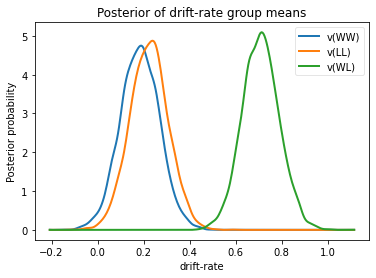

In [24]:
v_WW, v_LL, v_WL = m_stim_all.nodes_db.node[['v(WW)', 'v(LL)', 'v(WL)']]
hddm.analyze.plot_posterior_nodes([v_WW, v_LL, v_WL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
# plt.savefig('hddm_demo_fig_06.pdf')

In [25]:
print("P(WW > LL) = ", (v_WW.trace() > v_LL.trace()).mean())
print("P(LL > WL) = ", (v_LL.trace() > v_WL.trace()).mean())

P(WW > LL) =  0.3656875
P(LL > WL) =  0.0


In [26]:
print("Lumped model DIC: %f" % m1.dic)
print("Stimulus model DIC: %f" % m_stim_all.dic)

Lumped model DIC: 10972.869356
Stimulus model DIC: 10786.734926


## Within-subject effects

In [27]:
from patsy import dmatrix
dmatrix("C(stim, Treatment('WL'))", data.head(10))

DesignMatrix with shape (10, 3)
  Intercept  C(stim, Treatment('WL'))[T.LL]  C(stim, Treatment('WL'))[T.WW]
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               0                               1
          1                               0                               0
          1                               1                               0
          1                               0                               0
          1                               0                               1
          1                               0                               0
  Terms:
    'Intercept' (column 0)
    "C(stim, Treatment('WL'))" (columns 1:3)

The original code in the tutorial was:

```
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))")
m_within_subj.sample(5000, burn=200)
```

Here we used four chains for parallel processing

In [28]:
def run_m_reg(id, data=None, samples=None, burn=None, save_name="cavanagh2011_reg"): 
    
    import hddm
    
    dbname = save_name + '_chain_%i.db'%id 
    mname  = save_name + '_chain_%i'%id
    
    m = hddm.HDDMRegressor(data,
                           "v ~ C(stim, Treatment('WL'))")
    m.find_starting_values()
    m.sample(samples, burn=burn, dbname=dbname, db='pickle') # it's neccessary to save the model data
    m.save(mname)
    
    return m

In [29]:
m_reg_list = p_map(partial(run_m_reg, data=data, samples=5000, burn=1000),
                   range(chains))

  0%|          | 0/4 [00:00<?, ?it/s]

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]
Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]


/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [                  0%                  ] 2 of 5000 complete in 0.5 sec[                  0%                  ] 2 of 5000 complete in 0.6 sec[                  0%                  ] 2 of 5000 complete in 0.6 sec[                  0%                  ] 2 of 5000 complete in 0.7 sec[                  0%                  ] 4 of 5000 complete in 1.1 sec[                  0%                  ] 4 of 5000 complete in 1.2 sec[                  0%                  ] 4 of 5000 complete in 1.1 sec[                  0%                  ] 4 of 5000 complete in 1.3 sec[                  0%                  ] 6 of 5000 complete in 1.7 sec[                  0%                  ] 7 of 5000 complete in 1.8 sec[                  0%                  ] 7 of 5000 complete in 1.8 sec[                  0%                  ] 7 of 5000 complete in 2.0 sec[                  0%                  ] 9 of 5000 complete in 2.4 sec[                  0%                  ] 10 of 5000 complete in 2.5 sec[                 

 [                  1%                  ] 85 of 5000 complete in 18.8 sec[                  1%                  ] 87 of 5000 complete in 18.9 sec[                  1%                  ] 88 of 5000 complete in 19.3 sec[                  1%                  ] 88 of 5000 complete in 19.5 sec[                  1%                  ] 88 of 5000 complete in 19.6 sec[                  1%                  ] 90 of 5000 complete in 19.6 sec[                  1%                  ] 91 of 5000 complete in 20.0 sec[                  1%                  ] 91 of 5000 complete in 20.1 sec[                  1%                  ] 93 of 5000 complete in 20.2 sec[                  1%                  ] 91 of 5000 complete in 20.2 sec[                  1%                  ] 94 of 5000 complete in 20.7 sec[                  1%                  ] 94 of 5000 complete in 20.7 sec[                  1%                  ] 94 of 5000 complete in 20.8 sec[                  1%                  ] 96 of 5000 complete in

 [-                 3%                  ] 171 of 5000 complete in 37.1 sec[-                 3%                  ] 172 of 5000 complete in 37.3 sec[-                 3%                  ] 172 of 5000 complete in 37.5 sec[-                 3%                  ] 172 of 5000 complete in 37.6 sec[-                 3%                  ] 174 of 5000 complete in 37.8 sec[-                 3%                  ] 175 of 5000 complete in 38.0 sec[-                 3%                  ] 175 of 5000 complete in 38.2 sec[-                 3%                  ] 175 of 5000 complete in 38.2 sec[-                 3%                  ] 177 of 5000 complete in 38.5 sec[-                 3%                  ] 178 of 5000 complete in 38.6 sec[-                 3%                  ] 178 of 5000 complete in 38.8 sec[-                 3%                  ] 178 of 5000 complete in 38.9 sec[-                 3%                  ] 180 of 5000 complete in 39.1 sec[-                 3%                  ] 181 of 50

 --                6%                  ] 301 of 5000 complete in 65.4 secc[-                 5%                  ] 256 of 5000 complete in 55.7 sec[-                 5%                  ] 256 of 5000 complete in 55.7 sec[-                 5%                  ] 258 of 5000 complete in 55.9 sec[-                 5%                  ] 259 of 5000 complete in 56.3 sec[-                 5%                  ] 259 of 5000 complete in 56.2 sec[-                 5%                  ] 259 of 5000 complete in 56.3 sec[-                 5%                  ] 261 of 5000 complete in 56.5 sec[-                 5%                  ] 262 of 5000 complete in 57.0 sec[-                 5%                  ] 262 of 5000 complete in 57.0 sec[-                 5%                  ] 262 of 5000 complete in 56.9 sec[--                5%                  ] 264 of 5000 complete in 57.1 sec[--                5%                  ] 265 of 5000 complete in 57.6 sec[--                5%                  ] 265 of 50

 --                7%                  ] 378 of 5000 complete in 82.2 secc[--                6%                  ] 342 of 5000 complete in 74.3 sec[--                6%                  ] 343 of 5000 complete in 74.4 sec[--                6%                  ] 343 of 5000 complete in 74.6 sec[--                6%                  ] 342 of 5000 complete in 74.7 sec[--                6%                  ] 345 of 5000 complete in 74.9 sec[--                6%                  ] 346 of 5000 complete in 75.0 sec[--                6%                  ] 344 of 5000 complete in 75.2 sec[--                6%                  ] 346 of 5000 complete in 75.3 sec[--                6%                  ] 348 of 5000 complete in 75.6 sec[--                6%                  ] 349 of 5000 complete in 75.7 sec[--                6%                  ] 347 of 5000 complete in 75.8 sec[--                6%                  ] 349 of 5000 complete in 75.9 sec[--                7%                  ] 351 of 50

 [---               8%                  ] 427 of 5000 complete in 92.7 sec[---               8%                  ] 427 of 5000 complete in 92.8 sec[---               8%                  ] 425 of 5000 complete in 92.7 sec[---               8%                  ] 429 of 5000 complete in 93.3 sec[---               8%                  ] 430 of 5000 complete in 93.4 sec[---               8%                  ] 430 of 5000 complete in 93.4 sec[---               8%                  ] 428 of 5000 complete in 93.4 sec[---               8%                  ] 432 of 5000 complete in 94.0 sec[---               8%                  ] 433 of 5000 complete in 94.0 sec[---               8%                  ] 433 of 5000 complete in 94.1 sec[---               8%                  ] 431 of 5000 complete in 94.1 sec[---               8%                  ] 435 of 5000 complete in 94.7 sec[---               8%                  ] 436 of 5000 complete in 94.7 sec[---               8%                  ] 434 of 50

 [---              10%                  ] 510 of 5000 complete in 111.1 sec[---              10%                  ] 509 of 5000 complete in 111.1 sec[---              10%                  ] 511 of 5000 complete in 111.2 sec[---              10%                  ] 514 of 5000 complete in 111.6 sec[---              10%                  ] 513 of 5000 complete in 111.7 sec[---              10%                  ] 512 of 5000 complete in 111.8 sec[---              10%                  ] 514 of 5000 complete in 111.8 sec[---              10%                  ] 517 of 5000 complete in 112.2 sec[---              10%                  ] 516 of 5000 complete in 112.3 sec[---              10%                  ] 515 of 5000 complete in 112.4 sec[---              10%                  ] 517 of 5000 complete in 112.5 sec[---              10%                  ] 520 of 5000 complete in 112.9 sec[---              10%                  ] 519 of 5000 complete in 113.0 sec[---              10%                

 [----             11%                  ] 593 of 5000 complete in 129.0 sec[----             11%                  ] 594 of 5000 complete in 129.3 sec[----             11%                  ] 594 of 5000 complete in 129.3 sec[----             11%                  ] 595 of 5000 complete in 129.4 sec[----             11%                  ] 596 of 5000 complete in 129.7 sec[----             11%                  ] 597 of 5000 complete in 129.9 sec[----             11%                  ] 597 of 5000 complete in 130.0 sec[----             11%                  ] 598 of 5000 complete in 130.0 sec[----             11%                  ] 599 of 5000 complete in 130.3 sec[----             12%                  ] 600 of 5000 complete in 130.5 sec[----             12%                  ] 600 of 5000 complete in 130.6 sec[----             12%                  ] 601 of 5000 complete in 130.7 sec[----             12%                  ] 602 of 5000 complete in 131.0 sec[----             12%                

 [-----            13%                  ] 676 of 5000 complete in 146.4 sec[-----            13%                  ] 678 of 5000 complete in 146.6 sec[-----            13%                  ] 677 of 5000 complete in 146.7 sec[-----            13%                  ] 678 of 5000 complete in 146.8 sec[-----            13%                  ] 679 of 5000 complete in 147.0 sec[-----            13%                  ] 681 of 5000 complete in 147.2 sec[-----            13%                  ] 681 of 5000 complete in 147.4 sec[-----            13%                  ] 680 of 5000 complete in 147.3 sec[-----            13%                  ] 682 of 5000 complete in 147.6 sec[-----            13%                  ] 684 of 5000 complete in 147.8 sec[-----            13%                  ] 684 of 5000 complete in 148.0 sec[-----            13%                  ] 683 of 5000 complete in 147.9 sec[-----            13%                  ] 685 of 5000 complete in 148.2 sec[-----            13%                

 [-----            15%                  ] 759 of 5000 complete in 163.5 sec[-----            15%                  ] 760 of 5000 complete in 163.6 sec[-----            15%                  ] 762 of 5000 complete in 163.7 sec[-----            15%                  ] 761 of 5000 complete in 163.8 sec[-----            15%                  ] 762 of 5000 complete in 164.2 sec[-----            15%                  ] 763 of 5000 complete in 164.2 sec[-----            15%                  ] 765 of 5000 complete in 164.3 sec[-----            15%                  ] 764 of 5000 complete in 164.4 sec[-----            15%                  ] 766 of 5000 complete in 164.8 sec[-----            15%                  ] 765 of 5000 complete in 164.8 sec[-----            15%                  ] 768 of 5000 complete in 165.0 sec[-----            15%                  ] 767 of 5000 complete in 165.1 sec[-----            15%                  ] 769 of 5000 complete in 165.4 sec[-----            15%                

 [------           16%                  ] 843 of 5000 complete in 180.5 sec[------           16%                  ] 843 of 5000 complete in 180.7 sec[------           16%                  ] 844 of 5000 complete in 181.0 sec[------           16%                  ] 845 of 5000 complete in 181.0 sec[------           16%                  ] 846 of 5000 complete in 181.2 sec[------           16%                  ] 846 of 5000 complete in 181.4 sec[------           16%                  ] 847 of 5000 complete in 181.6 sec[------           16%                  ] 848 of 5000 complete in 181.6 sec[------           16%                  ] 849 of 5000 complete in 181.8 sec[------           16%                  ] 849 of 5000 complete in 182.0 sec[------           17%                  ] 850 of 5000 complete in 182.3 sec[------           17%                  ] 851 of 5000 complete in 182.2 sec[------           17%                  ] 852 of 5000 complete in 182.4 sec[------           17%                

 [-------          18%                  ] 926 of 5000 complete in 197.5 sec[-------          18%                  ] 927 of 5000 complete in 197.9 sec[-------          18%                  ] 928 of 5000 complete in 197.9 sec[-------          18%                  ] 927 of 5000 complete in 198.0 sec[-------          18%                  ] 929 of 5000 complete in 198.0 sec[-------          18%                  ] 930 of 5000 complete in 198.6 sec[-------          18%                  ] 931 of 5000 complete in 198.6 sec[-------          18%                  ] 930 of 5000 complete in 198.6 sec[-------          18%                  ] 932 of 5000 complete in 198.6 sec[-------          18%                  ] 933 of 5000 complete in 199.2 sec[-------          18%                  ] 934 of 5000 complete in 199.1 sec[-------          18%                  ] 933 of 5000 complete in 199.3 sec[-------          18%                  ] 935 of 5000 complete in 199.3 sec[-------          18%                

 -------          20%                  ] 1018 of 5000 complete in 216.2 secc[-------          20%                  ] 1008 of 5000 complete in 214.8 sec[-------          20%                  ] 1011 of 5000 complete in 215.0 sec[-------          20%                  ] 1012 of 5000 complete in 215.0 sec[-------          20%                  ] 1013 of 5000 complete in 215.2 sec[-------          20%                  ] 1011 of 5000 complete in 215.4 sec[-------          20%                  ] 1015 of 5000 complete in 215.6 sec[-------          20%                  ] 1014 of 5000 complete in 215.6 sec[-------          20%                  ] 1016 of 5000 complete in 215.8 sec[-------          20%                  ] 1014 of 5000 complete in 216.0 sec [-------          20%                  ] 1017 of 5000 complete in 216.2 sec[-------          20%                  ] 1019 of 5000 complete in 216.4 sec[-------          20%                  ] 1017 of 5000 complete in 216.6 sec[-------          20%  

 [--------         21%                  ] 1092 of 5000 complete in 231.7 sec[--------         21%                  ] 1092 of 5000 complete in 231.8 sec[--------         21%                  ] 1096 of 5000 complete in 232.1 sec[--------         21%                  ] 1094 of 5000 complete in 232.1 sec[--------         21%                  ] 1095 of 5000 complete in 232.3 sec[--------         21%                  ] 1095 of 5000 complete in 232.5 sec[--------         21%                  ] 1099 of 5000 complete in 232.7 sec[--------         21%                  ] 1097 of 5000 complete in 232.7 sec[--------         21%                  ] 1098 of 5000 complete in 232.9 sec[--------         21%                  ] 1098 of 5000 complete in 233.1 sec[--------         22%                  ] 1102 of 5000 complete in 233.3 sec[--------         22%                  ] 1100 of 5000 complete in 233.4 sec[--------         22%                  ] 1101 of 5000 complete in 233.5 sec[--------         22%   

 [--------         23%                  ] 1177 of 5000 complete in 248.6 sec[--------         23%                  ] 1175 of 5000 complete in 248.8 sec[--------         23%                  ] 1176 of 5000 complete in 248.9 sec[--------         23%                  ] 1176 of 5000 complete in 249.1 sec[--------         23%                  ] 1180 of 5000 complete in 249.2 sec[--------         23%                  ] 1178 of 5000 complete in 249.4 sec[--------         23%                  ] 1179 of 5000 complete in 249.5 sec[--------         23%                  ] 1179 of 5000 complete in 249.7 sec[--------         23%                  ] 1183 of 5000 complete in 249.8 sec[--------         23%                  ] 1181 of 5000 complete in 250.0 sec[--------         23%                  ] 1182 of 5000 complete in 250.2 sec[--------         23%                  ] 1182 of 5000 complete in 250.3 sec[---------        23%                  ] 1186 of 5000 complete in 250.4 sec[--------         23%   

 [---------        25%                  ] 1256 of 5000 complete in 265.6 sec[---------        25%                  ] 1257 of 5000 complete in 265.7 sec[---------        25%                  ] 1260 of 5000 complete in 265.9 sec[---------        25%                  ] 1261 of 5000 complete in 266.0 sec[---------        25%                  ] 1259 of 5000 complete in 266.2 sec[---------        25%                  ] 1260 of 5000 complete in 266.4 sec[---------        25%                  ] 1263 of 5000 complete in 266.6 sec[---------        25%                  ] 1264 of 5000 complete in 266.6 sec[---------        25%                  ] 1262 of 5000 complete in 266.7 sec[---------        25%                  ] 1263 of 5000 complete in 267.0 sec[---------        25%                  ] 1266 of 5000 complete in 267.2 sec[---------        25%                  ] 1267 of 5000 complete in 267.2 sec[---------        25%                  ] 1265 of 5000 complete in 267.4 sec[---------        25%   

 [----------       26%                  ] 1337 of 5000 complete in 282.3 sec[----------       26%                  ] 1341 of 5000 complete in 282.5 sec[----------       26%                  ] 1341 of 5000 complete in 282.7 sec[----------       26%                  ] 1345 of 5000 complete in 282.9 sec[----------       26%                  ] 1340 of 5000 complete in 282.9 sec[----------       26%                  ] 1344 of 5000 complete in 283.2 sec[----------       26%                  ] 1344 of 5000 complete in 283.3 sec[----------       26%                  ] 1348 of 5000 complete in 283.5 sec[----------       26%                  ] 1343 of 5000 complete in 283.5 sec[----------       26%                  ] 1347 of 5000 complete in 283.7 sec[----------       26%                  ] 1347 of 5000 complete in 284.0 sec[----------       27%                  ] 1351 of 5000 complete in 284.1 sec[----------       26%                  ] 1346 of 5000 complete in 284.1 sec[----------       27%   

 [----------       28%                  ] 1422 of 5000 complete in 299.1 sec[----------       28%                  ] 1426 of 5000 complete in 299.5 sec[----------       28%                  ] 1421 of 5000 complete in 299.5 sec[----------       28%                  ] 1424 of 5000 complete in 299.6 sec[----------       28%                  ] 1425 of 5000 complete in 299.7 sec[----------       28%                  ] 1429 of 5000 complete in 300.1 sec[----------       28%                  ] 1424 of 5000 complete in 300.1 sec[----------       28%                  ] 1427 of 5000 complete in 300.2 sec[----------       28%                  ] 1428 of 5000 complete in 300.3 sec[----------       28%                  ] 1432 of 5000 complete in 300.7 sec[----------       28%                  ] 1427 of 5000 complete in 300.7 sec[----------       28%                  ] 1431 of 5000 complete in 300.8 sec[----------       28%                  ] 1430 of 5000 complete in 300.8 sec[----------       28%   

 [-----------      30%                  ] 1502 of 5000 complete in 316.1 sec[-----------      30%                  ] 1505 of 5000 complete in 316.4 sec[-----------      30%                  ] 1506 of 5000 complete in 316.5 sec[-----------      30%                  ] 1510 of 5000 complete in 316.7 sec[-----------      30%                  ] 1505 of 5000 complete in 316.7 sec[-----------      30%                  ] 1508 of 5000 complete in 317.0 sec[-----------      30%                  ] 1509 of 5000 complete in 317.1 sec[-----------      30%                  ] 1513 of 5000 complete in 317.4 sec[-----------      30%                  ] 1508 of 5000 complete in 317.4 sec[-----------      30%                  ] 1511 of 5000 complete in 317.6 sec[-----------      30%                  ] 1512 of 5000 complete in 317.8 sec[-----------      30%                  ] 1516 of 5000 complete in 318.0 sec[-----------      30%                  ] 1511 of 5000 complete in 318.0 sec[-----------      30%   

 [------------     31%                  ] 1587 of 5000 complete in 333.1 sec[------------     31%                  ] 1591 of 5000 complete in 333.3 sec[------------     31%                  ] 1586 of 5000 complete in 333.3 sec[------------     31%                  ] 1589 of 5000 complete in 333.5 sec[------------     31%                  ] 1590 of 5000 complete in 333.8 sec[------------     31%                  ] 1594 of 5000 complete in 333.9 sec[------------     31%                  ] 1589 of 5000 complete in 333.8 sec[------------     31%                  ] 1592 of 5000 complete in 334.1 sec[------------     31%                  ] 1593 of 5000 complete in 334.4 sec[------------     31%                  ] 1592 of 5000 complete in 334.4 sec[------------     31%                  ] 1597 of 5000 complete in 334.5 sec[------------     31%                  ] 1595 of 5000 complete in 334.8 sec[------------     31%                  ] 1596 of 5000 complete in 335.0 sec[------------     31%   

 [------------     33%                  ] 1667 of 5000 complete in 349.8 sec[------------     33%                  ] 1670 of 5000 complete in 350.1 sec[------------     33%                  ] 1671 of 5000 complete in 350.3 sec[------------     33%                  ] 1675 of 5000 complete in 350.4 sec[------------     33%                  ] 1670 of 5000 complete in 350.4 sec[------------     33%                  ] 1673 of 5000 complete in 350.8 sec[------------     33%                  ] 1674 of 5000 complete in 350.9 sec[------------     33%                  ] 1678 of 5000 complete in 350.9 sec[------------     33%                  ] 1673 of 5000 complete in 351.0 sec[------------     33%                  ] 1676 of 5000 complete in 351.5 sec[------------     33%                  ] 1677 of 5000 complete in 351.5 sec[------------     33%                  ] 1681 of 5000 complete in 351.5 sec[------------     33%                  ] 1676 of 5000 complete in 351.6 sec[------------     33%   

 [-------------    35%                  ] 1751 of 5000 complete in 367.0 sec[-------------    35%                  ] 1752 of 5000 complete in 367.1 sec[-------------    35%                  ] 1757 of 5000 complete in 367.3 sec[-------------    35%                  ] 1754 of 5000 complete in 367.3 sec[-------------    35%                  ] 1754 of 5000 complete in 367.6 sec[-------------    35%                  ] 1755 of 5000 complete in 367.8 sec[-------------    35%                  ] 1760 of 5000 complete in 367.8 sec[-------------    35%                  ] 1757 of 5000 complete in 368.0 sec[-------------    35%                  ] 1757 of 5000 complete in 368.2 sec[-------------    35%                  ] 1758 of 5000 complete in 368.4 sec[-------------    35%                  ] 1763 of 5000 complete in 368.4 sec[-------------    35%                  ] 1760 of 5000 complete in 368.6 sec[-------------    35%                  ] 1760 of 5000 complete in 368.8 sec[-------------    35%   

 -------------    36%                  ] 1838 of 5000 complete in 383.9 sec [-------------    36%                  ] 1833 of 5000 complete in 383.9 sec[-------------    36%                  ] 1835 of 5000 complete in 384.0 sec[-------------    36%                  ] 1838 of 5000 complete in 384.3 sec[-------------    36%                  ] 1841 of 5000 complete in 384.5 sec[-------------    36%                  ] 1836 of 5000 complete in 384.5 sec[-------------    36%                  ] 1838 of 5000 complete in 384.6 sec[-------------    36%                  ] 1841 of 5000 complete in 384.9 sec[--------------   36%                  ] 1844 of 5000 complete in 385.0 sec[-------------    36%                  ] 1839 of 5000 complete in 385.1 sec[-------------    36%                  ] 1841 of 5000 complete in 385.1 sec[--------------   36%                  ] 1844 of 5000 complete in 385.6 sec[--------------   36%                  ] 1847 of 5000 complete in 385.7 sec[-------------    36%   

 [--------------   38%                  ] 1916 of 5000 complete in 400.8 sec[--------------   38%                  ] 1917 of 5000 complete in 401.1 sec  [--------------   38%                  ] 1919 of 5000 complete in 401.1 sec[--------------   38%                  ] 1922 of 5000 complete in 401.2 sec[--------------   38%                  ] 1919 of 5000 complete in 401.4 sec[--------------   38%                  ] 1920 of 5000 complete in 401.7 sec[--------------   38%                  ] 1922 of 5000 complete in 401.7 sec[--------------   38%                  ] 1925 of 5000 complete in 401.8 sec[--------------   38%                  ] 1922 of 5000 complete in 402.0 sec[--------------   38%                  ] 1923 of 5000 complete in 402.4 sec[--------------   38%                  ] 1925 of 5000 complete in 402.3 sec[--------------   38%                  ] 1928 of 5000 complete in 402.4 sec[--------------   38%                  ] 1925 of 5000 complete in 402.6 sec  [--------------   38

 [---------------  40%                  ] 2000 of 5000 complete in 417.6 sec[---------------  40%                  ] 2000 of 5000 complete in 417.7 sec[---------------  40%                  ] 2003 of 5000 complete in 418.0 sec[---------------  40%                  ] 2001 of 5000 complete in 418.2 sec[---------------  40%                  ] 2003 of 5000 complete in 418.2 sec[---------------  40%                  ] 2003 of 5000 complete in 418.3 sec[---------------  40%                  ] 2006 of 5000 complete in 418.5 sec[---------------  40%                  ] 2004 of 5000 complete in 418.8 sec[---------------  40%                  ] 2006 of 5000 complete in 418.8 sec[---------------  40%                  ] 2006 of 5000 complete in 418.9 sec[---------------  40%                  ] 2009 of 5000 complete in 419.1 sec[---------------  40%                  ] 2007 of 5000 complete in 419.4 sec[---------------  40%                  ] 2009 of 5000 complete in 419.4 sec[---------------  40%   

 ---------------  42%                  ] 2103 of 5000 complete in 439.2 secc[---------------  41%                  ] 2084 of 5000 complete in 434.8 sec[---------------  41%                  ] 2082 of 5000 complete in 434.8 sec[---------------  41%                  ] 2084 of 5000 complete in 434.9 sec[---------------  41%                  ] 2087 of 5000 complete in 435.1 sec[---------------  41%                  ] 2087 of 5000 complete in 435.4 sec[---------------  41%                  ] 2085 of 5000 complete in 435.5 sec[---------------  41%                  ] 2087 of 5000 complete in 435.5 sec[---------------  41%                  ] 2090 of 5000 complete in 435.7 sec[---------------  41%                  ] 2090 of 5000 complete in 436.0 sec[---------------  41%                  ] 2088 of 5000 complete in 436.1 sec[---------------  41%                  ] 2090 of 5000 complete in 436.1 sec[---------------  41%                  ] 2093 of 5000 complete in 436.4 sec[---------------  41%   

 [---------------- 43%                  ] 2163 of 5000 complete in 451.7 sec[---------------- 43%                  ] 2168 of 5000 complete in 451.7 sec[---------------- 43%                  ] 2168 of 5000 complete in 451.9 sec[---------------- 43%                  ] 2168 of 5000 complete in 452.2 sec[---------------- 43%                  ] 2166 of 5000 complete in 452.3 sec[---------------- 43%                  ] 2171 of 5000 complete in 452.3 sec[---------------- 43%                  ] 2171 of 5000 complete in 452.6 sec[---------------- 43%                  ] 2171 of 5000 complete in 452.8 sec[---------------- 43%                  ] 2169 of 5000 complete in 452.9 sec[---------------- 43%                  ] 2174 of 5000 complete in 452.9 sec[---------------- 43%                  ] 2174 of 5000 complete in 453.2 sec[---------------- 43%                  ] 2174 of 5000 complete in 453.4 sec[---------------- 43%                  ] 2172 of 5000 complete in 453.5 sec[---------------- 43%   

 [-----------------44%                  ] 2249 of 5000 complete in 468.4 sec[-----------------44%                  ] 2246 of 5000 complete in 468.5 sec[-----------------45%                  ] 2251 of 5000 complete in 468.8 sec[-----------------44%                  ] 2249 of 5000 complete in 468.8 sec[-----------------45%                  ] 2252 of 5000 complete in 469.0 sec[-----------------44%                  ] 2249 of 5000 complete in 469.2 sec[-----------------45%                  ] 2254 of 5000 complete in 469.4 sec[-----------------45%                  ] 2252 of 5000 complete in 469.4 sec[-----------------45%                  ] 2255 of 5000 complete in 469.6 sec[-----------------45%                  ] 2252 of 5000 complete in 469.9 sec[-----------------45%                  ] 2257 of 5000 complete in 470.0 sec[-----------------45%                  ] 2255 of 5000 complete in 470.0 sec[-----------------45%                  ] 2258 of 5000 complete in 470.2 sec[-----------------45%   

 [-----------------46%                  ] 2332 of 5000 complete in 485.3 sec[-----------------46%                  ] 2330 of 5000 complete in 485.5 sec[-----------------46%                  ] 2333 of 5000 complete in 485.4 sec[-----------------46%                  ] 2330 of 5000 complete in 485.9 sec[-----------------46%                  ] 2335 of 5000 complete in 486.0 sec[-----------------46%                  ] 2333 of 5000 complete in 486.1 sec[-----------------46%                  ] 2336 of 5000 complete in 486.1 sec[-----------------46%                  ] 2333 of 5000 complete in 486.4 sec[-----------------46%                  ] 2338 of 5000 complete in 486.5 sec[-----------------46%                  ] 2336 of 5000 complete in 486.7 sec[-----------------46%                  ] 2339 of 5000 complete in 486.8 sec[-----------------46%                  ] 2336 of 5000 complete in 487.0 sec[-----------------46%                  ] 2341 of 5000 complete in 487.2 sec[-----------------46%   

 [-----------------48%                  ] 2416 of 5000 complete in 502.3 sec[-----------------48%                  ] 2411 of 5000 complete in 502.4 sec[-----------------48%                  ] 2411 of 5000 complete in 502.4 sec[-----------------48%                  ] 2417 of 5000 complete in 502.8 sec[-----------------48%                  ] 2419 of 5000 complete in 502.9 sec[-----------------48%                  ] 2414 of 5000 complete in 503.0 sec[-----------------48%                  ] 2414 of 5000 complete in 503.1 sec[-----------------48%                  ] 2420 of 5000 complete in 503.4 sec[-----------------48%                  ] 2422 of 5000 complete in 503.7 sec[-----------------48%                  ] 2417 of 5000 complete in 503.7 sec[-----------------48%                  ] 2417 of 5000 complete in 503.7 sec[-----------------48%                  ] 2423 of 5000 complete in 504.0 sec[-----------------48%                  ] 2425 of 5000 complete in 504.3 sec[-----------------48%   

 [-----------------49%                  ] 2498 of 5000 complete in 518.9 sec[-----------------49%                  ] 2497 of 5000 complete in 519.2 sec[-----------------49%                  ] 2495 of 5000 complete in 519.4 sec[-----------------49%                  ] 2495 of 5000 complete in 519.6 sec[-----------------50%                  ] 2501 of 5000 complete in 519.6 sec[-----------------50%                  ] 2500 of 5000 complete in 519.8 sec[-----------------49%                  ] 2498 of 5000 complete in 520.0 sec[-----------------49%                  ] 2498 of 5000 complete in 520.2 sec[-----------------50%                  ] 2504 of 5000 complete in 520.2 sec[-----------------50%                  ] 2503 of 5000 complete in 520.4 sec[-----------------50%                  ] 2501 of 5000 complete in 520.7 sec[-----------------50%                  ] 2501 of 5000 complete in 520.8 sec[-----------------50%                  ] 2507 of 5000 complete in 520.8 sec[-----------------50%   

 [-----------------51%                  ] 2576 of 5000 complete in 536.1 sec[-----------------51%                  ] 2576 of 5000 complete in 536.2 sec[-----------------51%                  ] 2581 of 5000 complete in 536.5 sec[-----------------51%                  ] 2582 of 5000 complete in 536.4 sec[-----------------51%                  ] 2579 of 5000 complete in 536.7 sec[-----------------51%                  ] 2579 of 5000 complete in 536.9 sec[-----------------51%                  ] 2584 of 5000 complete in 537.1 sec[-----------------51%                  ] 2585 of 5000 complete in 537.1 sec[-----------------51%                  ] 2582 of 5000 complete in 537.3 sec[-----------------51%                  ] 2582 of 5000 complete in 537.4 sec[-----------------51%                  ] 2587 of 5000 complete in 537.7 sec[-----------------51%                  ] 2588 of 5000 complete in 537.8 sec[-----------------51%                  ] 2585 of 5000 complete in 538.0 sec[-----------------51%   

 [-----------------53%                  ] 2660 of 5000 complete in 553.0 sec[-----------------53%                  ] 2662 of 5000 complete in 553.1 sec[-----------------53%                  ] 2660 of 5000 complete in 553.3 sec[-----------------53%                  ] 2663 of 5000 complete in 553.3 sec[-----------------53%                  ] 2663 of 5000 complete in 553.6 sec[-----------------53%                  ] 2665 of 5000 complete in 553.6 sec[-----------------53%                  ] 2663 of 5000 complete in 553.9 sec[-----------------53%                  ] 2666 of 5000 complete in 553.9 sec[-----------------53%                  ] 2666 of 5000 complete in 554.2 sec[-----------------53%                  ] 2668 of 5000 complete in 554.3 sec[-----------------53%                  ] 2666 of 5000 complete in 554.5 sec[-----------------53%                  ] 2669 of 5000 complete in 554.6 sec[-----------------53%                  ] 2669 of 5000 complete in 554.9 sec[-----------------53%   

 [-----------------54%                  ] 2741 of 5000 complete in 569.6 sec[-----------------54%                  ] 2744 of 5000 complete in 569.9 sec[-----------------54%                  ] 2744 of 5000 complete in 570.2 sec[-----------------54%                  ] 2746 of 5000 complete in 570.2 sec[-----------------54%                  ] 2744 of 5000 complete in 570.2 sec[-----------------54%                  ] 2747 of 5000 complete in 570.5 sec[-----------------54%                  ] 2747 of 5000 complete in 570.8 sec[-----------------54%                  ] 2749 of 5000 complete in 570.8 sec[-----------------54%                  ] 2747 of 5000 complete in 570.8 sec[-----------------55%                  ] 2750 of 5000 complete in 571.1 sec[-----------------55%                  ] 2752 of 5000 complete in 571.4 sec [-----------------55%                  ] 2750 of 5000 complete in 571.4 sec [-----------------55%                  ] 2750 of 5000 complete in 571.4 sec[-----------------55% 

 [-----------------56%-                 ] 2827 of 5000 complete in 586.8 sec[-----------------56%-                 ] 2825 of 5000 complete in 586.8 sec[-----------------56%-                 ] 2825 of 5000 complete in 586.8 sec[-----------------56%-                 ] 2828 of 5000 complete in 587.4 sec[-----------------56%-                 ] 2830 of 5000 complete in 587.4 sec[-----------------56%-                 ] 2828 of 5000 complete in 587.4 sec[-----------------56%-                 ] 2828 of 5000 complete in 587.4 sec[-----------------56%-                 ] 2833 of 5000 complete in 588.0 sec[-----------------56%-                 ] 2831 of 5000 complete in 588.0 sec[-----------------56%-                 ] 2831 of 5000 complete in 588.0 sec[-----------------56%-                 ] 2831 of 5000 complete in 588.0 sec[-----------------56%-                 ] 2834 of 5000 complete in 588.6 sec[-----------------56%-                 ] 2836 of 5000 complete in 588.6 sec[-----------------56%-  

 [-----------------58%--                ] 2906 of 5000 complete in 603.6 sec[-----------------58%--                ] 2909 of 5000 complete in 603.8 sec[-----------------58%--                ] 2911 of 5000 complete in 603.9 sec[-----------------58%--                ] 2909 of 5000 complete in 604.0 sec[-----------------58%--                ] 2909 of 5000 complete in 604.2 sec[-----------------58%--                ] 2914 of 5000 complete in 604.4 sec[-----------------58%--                ] 2912 of 5000 complete in 604.4 sec[-----------------58%--                ] 2912 of 5000 complete in 604.6 sec[-----------------58%--                ] 2912 of 5000 complete in 604.8 sec[-----------------58%--                ] 2915 of 5000 complete in 605.0 sec[-----------------58%--                ] 2917 of 5000 complete in 605.1 sec[-----------------58%--                ] 2915 of 5000 complete in 605.2 sec[-----------------58%--                ] 2915 of 5000 complete in 605.4 sec[-----------------58%-- 

 [-----------------59%--                ] 2992 of 5000 complete in 620.4 sec[-----------------59%--                ] 2990 of 5000 complete in 620.5 sec[-----------------59%--                ] 2990 of 5000 complete in 620.6 sec[-----------------59%--                ] 2995 of 5000 complete in 621.0 sec[-----------------59%--                ] 2993 of 5000 complete in 621.0 sec[-----------------59%--                ] 2993 of 5000 complete in 621.1 sec[-----------------59%--                ] 2993 of 5000 complete in 621.2 sec[-----------------59%--                ] 2998 of 5000 complete in 621.6 sec[-----------------59%--                ] 2996 of 5000 complete in 621.7 sec[-----------------59%--                ] 2996 of 5000 complete in 621.7 sec[-----------------59%--                ] 2996 of 5000 complete in 621.9 sec[-----------------60%--                ] 3001 of 5000 complete in 622.3 sec[-----------------59%--                ] 2999 of 5000 complete in 622.3 sec[-----------------59%-- 

 [-----------------61%---               ] 3071 of 5000 complete in 637.5 sec[-----------------61%---               ] 3076 of 5000 complete in 637.6 sec[-----------------61%---               ] 3074 of 5000 complete in 637.7 sec[-----------------61%---               ] 3074 of 5000 complete in 637.9 sec[-----------------61%---               ] 3074 of 5000 complete in 638.1 sec[-----------------61%---               ] 3079 of 5000 complete in 638.2 sec[-----------------61%---               ] 3077 of 5000 complete in 638.3 sec[-----------------61%---               ] 3077 of 5000 complete in 638.5 sec[-----------------61%---               ] 3082 of 5000 complete in 638.7 sec[-----------------61%---               ] 3077 of 5000 complete in 638.7 sec[-----------------61%---               ] 3080 of 5000 complete in 639.0 sec[-----------------61%---               ] 3080 of 5000 complete in 639.1 sec[-----------------61%---               ] 3085 of 5000 complete in 639.3 sec[-----------------61%---

 [-----------------63%---               ] 3155 of 5000 complete in 654.3 sec[-----------------63%---               ] 3155 of 5000 complete in 654.3 sec[-----------------63%----              ] 3160 of 5000 complete in 654.6 sec[-----------------63%---               ] 3155 of 5000 complete in 654.8 sec[-----------------63%----              ] 3158 of 5000 complete in 654.9 sec[-----------------63%----              ] 3158 of 5000 complete in 655.0 sec[-----------------63%----              ] 3163 of 5000 complete in 655.2 sec[-----------------63%----              ] 3158 of 5000 complete in 655.4 sec[-----------------63%----              ] 3161 of 5000 complete in 655.5 sec[-----------------63%----              ] 3161 of 5000 complete in 655.6 sec[-----------------63%----              ] 3166 of 5000 complete in 655.8 sec[-----------------63%----              ] 3161 of 5000 complete in 656.0 sec[-----------------63%----              ] 3164 of 5000 complete in 656.1 sec[-----------------63%---

 [-----------------64%----              ] 3236 of 5000 complete in 671.2 sec[-----------------64%----              ] 3239 of 5000 complete in 671.5 sec[-----------------64%----              ] 3244 of 5000 complete in 671.5 sec[-----------------64%----              ] 3236 of 5000 complete in 671.5 sec[-----------------64%----              ] 3239 of 5000 complete in 671.8 sec[-----------------64%----              ] 3242 of 5000 complete in 672.1 sec[-----------------64%----              ] 3239 of 5000 complete in 672.1 sec[-----------------64%----              ] 3247 of 5000 complete in 672.2 sec[-----------------64%----              ] 3242 of 5000 complete in 672.4 sec[-----------------64%----              ] 3242 of 5000 complete in 672.7 sec[-----------------64%----              ] 3245 of 5000 complete in 672.7 sec[-----------------65%----              ] 3250 of 5000 complete in 672.7 sec[-----------------64%----              ] 3245 of 5000 complete in 673.1 sec[-----------------64%---

 [-----------------66%-----             ] 3320 of 5000 complete in 688.1 sec[-----------------66%-----             ] 3325 of 5000 complete in 688.2 sec[-----------------66%-----             ] 3320 of 5000 complete in 688.4 sec[-----------------66%-----             ] 3320 of 5000 complete in 688.6 sec[-----------------66%-----             ] 3323 of 5000 complete in 688.8 sec[-----------------66%-----             ] 3328 of 5000 complete in 688.8 sec[-----------------66%-----             ] 3323 of 5000 complete in 689.0 sec[-----------------66%-----             ] 3323 of 5000 complete in 689.2 sec[-----------------66%-----             ] 3326 of 5000 complete in 689.4 sec[-----------------66%-----             ] 3331 of 5000 complete in 689.5 sec[-----------------66%-----             ] 3326 of 5000 complete in 689.6 sec[-----------------66%-----             ] 3326 of 5000 complete in 689.9 sec[-----------------66%-----             ] 3329 of 5000 complete in 690.0 sec[-----------------66%---

 -----------------69%------            ] 3482 of 5000 complete in 721.6 secc[-----------------68%-----             ] 3404 of 5000 complete in 705.2 sec[-----------------68%-----             ] 3401 of 5000 complete in 705.3 sec[-----------------68%-----             ] 3409 of 5000 complete in 705.6 sec[-----------------68%-----             ] 3404 of 5000 complete in 705.7 sec[-----------------68%-----             ] 3407 of 5000 complete in 705.8 sec[-----------------68%-----             ] 3404 of 5000 complete in 705.9 sec[-----------------68%-----             ] 3412 of 5000 complete in 706.3 sec[-----------------68%-----             ] 3407 of 5000 complete in 706.3 sec[-----------------68%-----             ] 3410 of 5000 complete in 706.4 sec[-----------------68%-----             ] 3407 of 5000 complete in 706.6 sec[-----------------68%-----             ] 3415 of 5000 complete in 706.9 sec[-----------------68%-----             ] 3413 of 5000 complete in 707.0 sec[-----------------68%---

 [-----------------69%------            ] 3485 of 5000 complete in 722.2 sec[-----------------69%------            ] 3490 of 5000 complete in 722.3 sec[-----------------69%------            ] 3488 of 5000 complete in 722.3 sec[-----------------69%------            ] 3485 of 5000 complete in 722.7 sec[-----------------69%------            ] 3493 of 5000 complete in 722.9 sec[-----------------69%------            ] 3488 of 5000 complete in 722.8 sec[-----------------69%------            ] 3491 of 5000 complete in 722.9 sec[-----------------69%------            ] 3488 of 5000 complete in 723.3 sec[-----------------69%------            ] 3496 of 5000 complete in 723.5 sec  [-----------------69%------            ] 3494 of 5000 complete in 723.5 sec[-----------------69%------            ] 3491 of 5000 complete in 723.5 sec[-----------------69%------            ] 3491 of 5000 complete in 723.9 sec[-----------------69%------            ] 3499 of 5000 complete in 724.1 sec[-----------------69%-

 [-----------------71%-------           ] 3566 of 5000 complete in 739.2 sec[-----------------71%-------           ] 3572 of 5000 complete in 739.5 sec[-----------------71%-------           ] 3574 of 5000 complete in 739.6 sec[-----------------71%-------           ] 3566 of 5000 complete in 739.7 sec[-----------------71%-------           ] 3569 of 5000 complete in 739.8 sec[-----------------71%-------           ] 3575 of 5000 complete in 740.2 sec[-----------------71%-------           ] 3577 of 5000 complete in 740.2 sec[-----------------71%-------           ] 3569 of 5000 complete in 740.3 sec[-----------------71%-------           ] 3572 of 5000 complete in 740.4 sec[-----------------71%-------           ] 3578 of 5000 complete in 740.8 sec[-----------------71%-------           ] 3580 of 5000 complete in 740.8 sec[-----------------71%-------           ] 3572 of 5000 complete in 740.9 sec[-----------------71%-------           ] 3575 of 5000 complete in 741.0 sec[-----------------71%---

 [-----------------72%-------           ] 3647 of 5000 complete in 756.3 sec[-----------------73%-------           ] 3653 of 5000 complete in 756.4 sec[-----------------73%-------           ] 3655 of 5000 complete in 756.5 sec[-----------------73%-------           ] 3653 of 5000 complete in 756.7 sec[-----------------73%-------           ] 3650 of 5000 complete in 756.9 sec[-----------------73%-------           ] 3656 of 5000 complete in 757.1 sec[-----------------73%-------           ] 3658 of 5000 complete in 757.1 sec[-----------------73%-------           ] 3656 of 5000 complete in 757.3 sec[-----------------73%-------           ] 3653 of 5000 complete in 757.6 sec[-----------------73%-------           ] 3659 of 5000 complete in 757.7 sec[-----------------73%-------           ] 3661 of 5000 complete in 757.8 sec[-----------------73%-------           ] 3659 of 5000 complete in 757.9 sec[-----------------73%-------           ] 3656 of 5000 complete in 758.1 sec[-----------------73%---

 [-----------------74%--------          ] 3734 of 5000 complete in 773.0 sec[-----------------74%--------          ] 3731 of 5000 complete in 773.3 sec[-----------------74%--------          ] 3734 of 5000 complete in 773.4 sec[-----------------74%--------          ] 3737 of 5000 complete in 773.6 sec[-----------------74%--------          ] 3739 of 5000 complete in 773.6 sec[-----------------74%--------          ] 3734 of 5000 complete in 773.9 sec[-----------------74%--------          ] 3737 of 5000 complete in 774.0 sec[-----------------74%--------          ] 3742 of 5000 complete in 774.2 sec[-----------------74%--------          ] 3740 of 5000 complete in 774.2 sec[-----------------74%--------          ] 3737 of 5000 complete in 774.5 sec[-----------------74%--------          ] 3740 of 5000 complete in 774.6 sec[-----------------74%--------          ] 3745 of 5000 complete in 774.8 sec[-----------------74%--------          ] 3743 of 5000 complete in 774.9 sec[-----------------74%---

 [-----------------76%--------          ] 3815 of 5000 complete in 790.0 sec[-----------------76%---------         ] 3820 of 5000 complete in 790.1 sec[-----------------76%--------          ] 3815 of 5000 complete in 790.3 sec[-----------------76%---------         ] 3818 of 5000 complete in 790.6 sec[-----------------76%---------         ] 3818 of 5000 complete in 790.5 sec[-----------------76%---------         ] 3823 of 5000 complete in 790.7 sec[-----------------76%---------         ] 3818 of 5000 complete in 791.0 sec[-----------------76%---------         ] 3821 of 5000 complete in 791.1 sec[-----------------76%---------         ] 3821 of 5000 complete in 791.2 sec[-----------------76%---------         ] 3826 of 5000 complete in 791.3 sec[-----------------76%---------         ] 3821 of 5000 complete in 791.6 sec[-----------------76%---------         ] 3824 of 5000 complete in 791.7 sec[-----------------76%---------         ] 3824 of 5000 complete in 791.8 sec[-----------------76%---

 [-----------------77%---------         ] 3896 of 5000 complete in 806.9 sec[-----------------77%---------         ] 3899 of 5000 complete in 807.1 sec[-----------------77%---------         ] 3899 of 5000 complete in 807.2 sec[-----------------78%---------         ] 3904 of 5000 complete in 807.2 sec[-----------------77%---------         ] 3899 of 5000 complete in 807.5 sec[-----------------78%---------         ] 3902 of 5000 complete in 807.7 sec[-----------------78%---------         ] 3902 of 5000 complete in 807.8 sec[-----------------78%---------         ] 3907 of 5000 complete in 807.8 sec[-----------------78%---------         ] 3902 of 5000 complete in 808.1 sec[-----------------78%---------         ] 3905 of 5000 complete in 808.3 sec[-----------------78%---------         ] 3905 of 5000 complete in 808.5 sec[-----------------78%---------         ] 3910 of 5000 complete in 808.5 sec[-----------------78%---------         ] 3905 of 5000 complete in 808.7 sec[-----------------78%---

 [-----------------79%----------        ] 3980 of 5000 complete in 823.8 sec[-----------------79%----------        ] 3980 of 5000 complete in 823.9 sec[-----------------79%----------        ] 3980 of 5000 complete in 824.3 sec[-----------------79%----------        ] 3988 of 5000 complete in 824.4 sec[-----------------79%----------        ] 3983 of 5000 complete in 824.4 sec[-----------------79%----------        ] 3983 of 5000 complete in 824.4 sec[-----------------79%----------        ] 3983 of 5000 complete in 824.9 sec[-----------------79%----------        ] 3991 of 5000 complete in 825.0 sec[-----------------79%----------        ] 3986 of 5000 complete in 825.0 sec[-----------------79%----------        ] 3986 of 5000 complete in 825.0 sec[-----------------79%----------        ] 3986 of 5000 complete in 825.5 sec[-----------------79%----------        ] 3994 of 5000 complete in 825.6 sec[-----------------79%----------        ] 3989 of 5000 complete in 825.6 sec[-----------------79%---

 [-----------------81%----------        ] 4064 of 5000 complete in 841.1 sec[-----------------81%----------        ] 4061 of 5000 complete in 841.2 sec[-----------------81%----------        ] 4068 of 5000 complete in 841.2 sec[-----------------81%----------        ] 4064 of 5000 complete in 841.3 sec[-----------------81%----------        ] 4067 of 5000 complete in 841.7 sec[-----------------81%----------        ] 4064 of 5000 complete in 841.8 sec[-----------------81%----------        ] 4071 of 5000 complete in 841.8 sec[-----------------81%----------        ] 4067 of 5000 complete in 842.0 sec[-----------------81%----------        ] 4067 of 5000 complete in 842.3 sec[-----------------81%----------        ] 4070 of 5000 complete in 842.3 sec[-----------------81%----------        ] 4074 of 5000 complete in 842.4 sec[-----------------81%----------        ] 4070 of 5000 complete in 842.6 sec[-----------------81%----------        ] 4073 of 5000 complete in 842.9 sec[-----------------81%---

 -----------------83%-----------       ] 4154 of 5000 complete in 859.5 secc[-----------------82%-----------       ] 4145 of 5000 complete in 858.1 sec[-----------------82%-----------       ] 4145 of 5000 complete in 858.3 sec[-----------------83%-----------       ] 4152 of 5000 complete in 858.3 sec[-----------------82%-----------       ] 4148 of 5000 complete in 858.3 sec[-----------------82%-----------       ] 4148 of 5000 complete in 858.8 sec[-----------------82%-----------       ] 4148 of 5000 complete in 858.9 sec[-----------------83%-----------       ] 4151 of 5000 complete in 858.9 sec[-----------------83%-----------       ] 4155 of 5000 complete in 858.9 sec[-----------------83%-----------       ] 4151 of 5000 complete in 859.4 sec[-----------------83%-----------       ] 4151 of 5000 complete in 859.5 sec [-----------------83%-----------       ] 4158 of 5000 complete in 859.5 sec[-----------------83%-----------       ] 4154 of 5000 complete in 860.1 sec[-----------------83%--

 [-----------------84%------------      ] 4233 of 5000 complete in 875.0 sec[-----------------84%------------      ] 4229 of 5000 complete in 875.0 sec[-----------------84%------------      ] 4229 of 5000 complete in 875.2 sec[-----------------84%------------      ] 4229 of 5000 complete in 875.1 sec[-----------------84%------------      ] 4232 of 5000 complete in 875.5 sec[-----------------84%------------      ] 4236 of 5000 complete in 875.6 sec[-----------------84%------------      ] 4232 of 5000 complete in 875.8 sec[-----------------84%------------      ] 4232 of 5000 complete in 875.7 sec[-----------------84%------------      ] 4235 of 5000 complete in 876.2 sec[-----------------84%------------      ] 4239 of 5000 complete in 876.3 sec[-----------------84%------------      ] 4235 of 5000 complete in 876.4 sec[-----------------84%------------      ] 4235 of 5000 complete in 876.4 sec[-----------------84%------------      ] 4238 of 5000 complete in 876.8 sec[-----------------84%---

 [-----------------86%------------      ] 4310 of 5000 complete in 891.7 sec[-----------------86%------------      ] 4310 of 5000 complete in 891.7 sec[-----------------86%------------      ] 4317 of 5000 complete in 892.0 sec[-----------------86%------------      ] 4313 of 5000 complete in 892.0 sec[-----------------86%------------      ] 4313 of 5000 complete in 892.3 sec[-----------------86%------------      ] 4313 of 5000 complete in 892.4 sec[-----------------86%------------      ] 4320 of 5000 complete in 892.6 sec[-----------------86%------------      ] 4316 of 5000 complete in 892.6 sec[-----------------86%------------      ] 4316 of 5000 complete in 892.9 sec[-----------------86%------------      ] 4316 of 5000 complete in 893.1 sec[-----------------86%------------      ] 4323 of 5000 complete in 893.2 sec[-----------------86%------------      ] 4319 of 5000 complete in 893.2 sec[-----------------86%------------      ] 4319 of 5000 complete in 893.5 sec[-----------------86%---

 [-----------------87%-------------     ] 4398 of 5000 complete in 908.5 sec[-----------------87%-------------     ] 4391 of 5000 complete in 908.7 sec[-----------------87%-------------     ] 4394 of 5000 complete in 908.8 sec[-----------------87%-------------     ] 4397 of 5000 complete in 909.0 sec[-----------------88%-------------     ] 4401 of 5000 complete in 909.1 sec[-----------------87%-------------     ] 4394 of 5000 complete in 909.3 sec[-----------------87%-------------     ] 4397 of 5000 complete in 909.4 sec[-----------------88%-------------     ] 4400 of 5000 complete in 909.7 sec[-----------------88%-------------     ] 4404 of 5000 complete in 909.7 sec[-----------------87%-------------     ] 4397 of 5000 complete in 909.9 sec[-----------------88%-------------     ] 4400 of 5000 complete in 910.1 sec[-----------------88%-------------     ] 4403 of 5000 complete in 910.3 sec[-----------------88%-------------     ] 4407 of 5000 complete in 910.3 sec[-----------------88%---

 -----------------90%--------------    ] 4535 of 5000 complete in 937.7 secc[-----------------89%--------------    ] 4478 of 5000 complete in 925.4 sec[-----------------89%--------------    ] 4482 of 5000 complete in 925.7 sec[-----------------89%--------------    ] 4478 of 5000 complete in 925.9 sec[-----------------89%--------------    ] 4475 of 5000 complete in 925.9 sec[-----------------89%--------------    ] 4481 of 5000 complete in 926.1 sec[-----------------89%--------------    ] 4485 of 5000 complete in 926.3 sec[-----------------89%--------------    ] 4481 of 5000 complete in 926.5 sec[-----------------89%--------------    ] 4478 of 5000 complete in 926.5 sec[-----------------89%--------------    ] 4484 of 5000 complete in 926.7 sec[-----------------89%--------------    ] 4488 of 5000 complete in 926.9 sec[-----------------89%--------------    ] 4484 of 5000 complete in 927.2 sec[-----------------89%--------------    ] 4481 of 5000 complete in 927.1 sec[-----------------89%---

 [-----------------91%--------------    ] 4559 of 5000 complete in 942.6 sec[-----------------91%--------------    ] 4556 of 5000 complete in 942.5 sec[-----------------91%--------------    ] 4562 of 5000 complete in 942.8 sec[-----------------91%--------------    ] 4566 of 5000 complete in 942.9 sec[-----------------91%--------------    ] 4559 of 5000 complete in 943.1 sec[-----------------91%--------------    ] 4562 of 5000 complete in 943.2 sec[-----------------91%--------------    ] 4565 of 5000 complete in 943.4 sec[-----------------91%--------------    ] 4569 of 5000 complete in 943.6 sec[-----------------91%--------------    ] 4565 of 5000 complete in 943.8 sec[-----------------91%--------------    ] 4562 of 5000 complete in 943.7 sec[-----------------91%--------------    ] 4568 of 5000 complete in 944.0 sec[-----------------91%--------------    ] 4572 of 5000 complete in 944.1 sec[-----------------91%--------------    ] 4568 of 5000 complete in 944.3 sec[-----------------91%---

 [-----------------92%---------------   ] 4637 of 5000 complete in 959.2 sec[-----------------92%---------------   ] 4643 of 5000 complete in 959.6 sec[-----------------92%---------------   ] 4645 of 5000 complete in 959.6 sec[-----------------92%---------------   ] 4646 of 5000 complete in 959.6 sec[-----------------92%---------------   ] 4640 of 5000 complete in 959.8 sec[-----------------92%---------------   ] 4646 of 5000 complete in 960.2 sec[-----------------92%---------------   ] 4648 of 5000 complete in 960.2 sec[-----------------92%---------------   ] 4649 of 5000 complete in 960.2 sec[-----------------92%---------------   ] 4643 of 5000 complete in 960.4 sec[-----------------92%---------------   ] 4649 of 5000 complete in 960.8 sec[-----------------93%---------------   ] 4651 of 5000 complete in 960.8 sec[-----------------93%---------------   ] 4652 of 5000 complete in 960.8 sec[-----------------92%---------------   ] 4646 of 5000 complete in 961.1 sec[-----------------93%---

 [-----------------94%---------------   ] 4726 of 5000 complete in 976.0 sec[-----------------94%---------------   ] 4727 of 5000 complete in 976.3 sec[-----------------94%---------------   ] 4721 of 5000 complete in 976.4 sec[-----------------94%---------------   ] 4727 of 5000 complete in 976.6 sec[-----------------94%---------------   ] 4729 of 5000 complete in 976.6 sec[-----------------94%---------------   ] 4730 of 5000 complete in 976.9 sec[-----------------94%---------------   ] 4724 of 5000 complete in 977.0 sec[-----------------94%---------------   ] 4730 of 5000 complete in 977.2 sec[-----------------94%---------------   ] 4732 of 5000 complete in 977.3 sec[-----------------94%---------------   ] 4733 of 5000 complete in 977.4 sec[-----------------94%---------------   ] 4727 of 5000 complete in 977.7 sec[-----------------94%---------------   ] 4733 of 5000 complete in 977.8 sec[-----------------94%---------------   ] 4735 of 5000 complete in 977.9 sec[-----------------94%---

 [-----------------96%----------------  ] 4802 of 5000 complete in 993.0 sec[-----------------96%----------------  ] 4808 of 5000 complete in 993.1 sec[-----------------96%----------------  ] 4808 of 5000 complete in 993.4 sec[-----------------96%----------------  ] 4813 of 5000 complete in 993.5 sec[-----------------96%----------------  ] 4805 of 5000 complete in 993.6 sec[-----------------96%----------------  ] 4811 of 5000 complete in 993.7 sec[-----------------96%----------------  ] 4811 of 5000 complete in 994.0 sec[-----------------96%----------------  ] 4816 of 5000 complete in 994.1 sec[-----------------96%----------------  ] 4808 of 5000 complete in 994.1 sec[-----------------96%----------------  ] 4814 of 5000 complete in 994.3 sec[-----------------96%----------------  ] 4814 of 5000 complete in 994.6 sec[-----------------96%----------------  ] 4819 of 5000 complete in 994.8 sec[-----------------96%----------------  ] 4811 of 5000 complete in 994.7 sec[-----------------96%---

 [-----------------97%----------------- ] 4883 of 5000 complete in 1009.6 sec[-----------------97%----------------- ] 4889 of 5000 complete in 1010.0 sec[-----------------97%----------------- ] 4894 of 5000 complete in 1010.1 sec[-----------------97%----------------- ] 4886 of 5000 complete in 1010.2 sec[-----------------97%----------------- ] 4892 of 5000 complete in 1010.3 sec[-----------------97%----------------- ] 4892 of 5000 complete in 1010.6 sec[-----------------97%----------------- ] 4897 of 5000 complete in 1010.8 sec[-----------------97%----------------- ] 4889 of 5000 complete in 1010.8 sec[-----------------97%----------------- ] 4895 of 5000 complete in 1010.9 sec[-----------------97%----------------- ] 4895 of 5000 complete in 1011.2 sec[-----------------97%----------------- ] 4892 of 5000 complete in 1011.3 sec[-----------------98%----------------- ] 4900 of 5000 complete in 1011.4 sec[-----------------97%----------------- ] 4898 of 5000 complete in 1011.5 sec[----------

 [-----------------99%----------------- ] 4967 of 5000 complete in 1026.3 sec[-----------------99%----------------- ] 4972 of 5000 complete in 1026.6 sec[-----------------99%----------------- ] 4975 of 5000 complete in 1026.7 sec[-----------------99%----------------- ] 4967 of 5000 complete in 1026.7 sec[-----------------99%----------------- ] 4970 of 5000 complete in 1026.9 sec[-----------------99%----------------- ] 4975 of 5000 complete in 1027.2 sec  [-----------------99%----------------- ] 4970 of 5000 complete in 1027.3 sec[-----------------99%----------------- ] 4978 of 5000 complete in 1027.3 sec[-----------------99%----------------- ] 4973 of 5000 complete in 1027.6 sec[-----------------99%----------------- ] 4978 of 5000 complete in 1027.8 sec[-----------------99%----------------- ] 4973 of 5000 complete in 1027.9 sec[-----------------99%----------------- ] 4981 of 5000 complete in 1028.0 sec[-----------------99%----------------- ] 4976 of 5000 complete in 1028.3 sec[--------

In [30]:
m_reg_all = kabuki.utils.concat_models(m_reg_list) 

Text(0.5, 1.0, 'Group mean posteriors of within-subject drift-rate effects.')

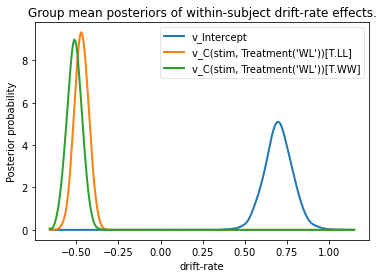

In [31]:
v_WL, v_LL, v_WW = m_reg_all.nodes_db.loc[["v_Intercept",
                                           "v_C(stim, Treatment('WL'))[T.LL]",
                                           "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')
# plt.savefig('hddm_demo_fig_07.pdf')

## Fitting regression models

In [32]:
m_reg = hddm.HDDMRegressor(data[data.dbs == 0],
                           "a ~ theta:C(conf, Treatment('LC'))",
                           depends_on={'v': 'stim'})
m_reg.sample(5000, burn=1000)

Adding these covariates:
['a_Intercept', "a_theta:C(conf, Treatment('LC'))[HC]", "a_theta:C(conf, Treatment('LC'))[LC]"]
 [-----------------100%-----------------] 5001 of 5000 complete in 1525.9 sec

P(a_theta < 0) =  0.04925


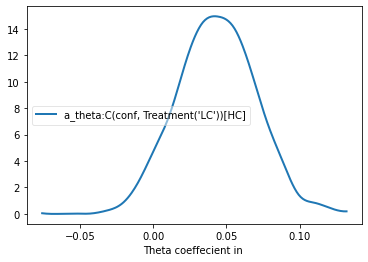

In [33]:
theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=20)
plt.xlabel('Theta coeffecient in ')
print("P(a_theta < 0) = ", (theta.trace() < 0).mean())

In [34]:
m_reg_off = hddm.HDDMRegressor(data[data.dbs == 1],
                               "a ~ theta:C(conf, Treatment('LC'))",
                               depends_on={'v': 'stim'})
m_reg_off.sample(5000, burn=1000)

Adding these covariates:
['a_Intercept', "a_theta:C(conf, Treatment('LC'))[HC]", "a_theta:C(conf, Treatment('LC'))[LC]"]
 [-----------------100%-----------------] 5001 of 5000 complete in 1512.6 sec-----------------53%                  ] 2661 of 5000 complete in 809.5 sec

P(a_theta > 0) =  0.05075


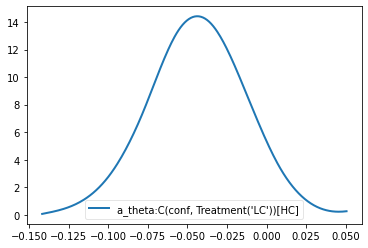

In [35]:
theta = m_reg_off.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=10)
print("P(a_theta > 0) = ", (theta.trace() > 0).mean())

## Dealing with outliers

This part of the tutorial seems outdated because, since 0.6.0, HDDM has a default setting `p_outliers=.05`. 

In [36]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5},
                                                   size=200, n_fast_outliers=10)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
m_no_outlier = hddm.HDDM(outlier_data)
m_no_outlier.sample(2000, burn=50)

 [-----------------100%-----------------] 2000 of 2000 complete in 6.5 sec

Text(0, 0.5, 'Probability density')

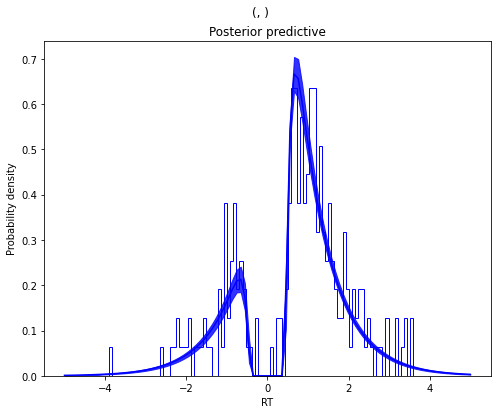

In [38]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
# plt.savefig('hddm_demo_fig_10.pdf')

In [39]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05)
m_outlier.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 6.4 sec

Text(0, 0.5, 'Probability density')

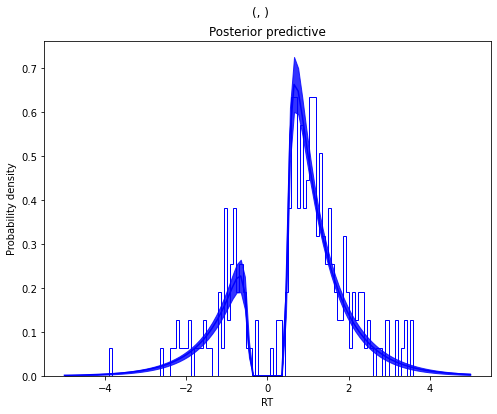

In [40]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')
# plt.savefig('hddm_demo_fig_11.pdf')